<u>**General Notebook TODO's:**</u>
- Figure out how to fix the paths, so that we can delete unnecessary code block
- Document each process better in the vivarium ecoli process Docstrings (it will automatically update in the jupyter notebook)
- Create topology registry and load in topologies from there instead of hard coding them in for each process.

<u>**Abhi TODO's:**</u>
- Finish up processes and make PR
    1. standardize doc strings in vivarium processes (pycharm)
    2. fix topology plots for each process
    3. make sure to check what field of data variable you are printing
    4. Add text (helps people read the jupyter notebook)
    5. Select a few molecules
    6. Plot all molecules globally
    7. Fix order of processes (most interesting process first!)
- Combine and run master and submit 2nd PR

<u>**Questions:**</u>
1. Which molecules to plot/present for each process?
2. What are other useful things to show for each process?

<u>**Miscellaneous notes/ideas:**</u>
- interactive widgets (plotly) - users can click boxes to choose which ones to plot

In [1]:
# ONLY RUN THIS CELL ONCE!!
# TODO: Fix this

# Make sure this is running out of vivarium-ecoli directory
import sys

sys.path[0] += '/..'

# display system path
sys.path[0]

'/Users/abhinavkumar/code/vivarium-ecoli/notebooks/..'

In [2]:
# The notebook officially starts here!!

# <u>**Vivarium E. coli**<u/>

This notebook demonstrates features of the processes in the Vivarium E. coli model. First, we show distinct features of how the processes work individually. Then we combine the processes in our simulation to demonstrate how they work together. Finally, we run the entire model.

# **1. Load the required components**

To run the E. coli model, we need a few things:
 1. **sim_data**: the model parameters from wcEcoli.
 2. **initial_state**: the initial state of the system -- a snapshot from wcEcoli.

## Load sim_data

In [3]:
from ecoli.library.sim_data import LoadSimData

SIM_DATA_PATH = '../reconstruction/sim_data/kb/simData.cPickle'

load_sim_data = LoadSimData(
            sim_data_path=SIM_DATA_PATH,
            seed=0)

## Get initial state snapshot

In [4]:
from ecoli.composites.ecoli_master import get_state_from_file

INITIAL_STATE_PATH = '../data/wcecoli_t1000.json'

initial_state = get_state_from_file(path=INITIAL_STATE_PATH)

# **2. Simulate Processes Individually**


Now we can load in our modular processes individually. For each process, we will:

1. Load in the process and parameters
2. Plot a **toplogy** diagram 
    - The topology is a network that demonstrates how a process connects to its stores (which hold state variables).
3. Display the **ports schema**
     - The port schema defines a systems ports (top-level keys), and the expected behavior of molecules under that port (its *schema*)
4. Simulate the process
5. Demonstrate distinct features of that process

In [5]:
from vivarium.core.process import Process
from vivarium.core.store import Store
from vivarium.core.engine import pp #, Engine?
from vivarium.core.composition import simulate_process
from vivarium.plots.topology import plot_topology
from vivarium.plots.simulation_output import plot_variables
import ecoli
import copy

## <u>Complexation<u/>

In [6]:
from ecoli.processes.complexation import Complexation

# print documentation from process docstring
print(ecoli.processes.complexation.__doc__)


Complexation

Macromolecular complexation sub-model. Encodes molecular simulation of macromolecular complexation, in which monomers are assembled into complexes.



In [7]:
# load in parameters
cplx_config = load_sim_data.get_complexation_config()

# initialize the process
complexation = Complexation(cplx_config)

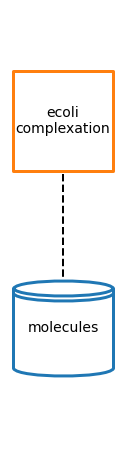

In [8]:
# initialize and plot topology
cplx_topology = {
    'molecules': ('bulk',)
}

cplx_topology_plot_settings = {
    'buffer': 1,
    'node_labels': {
        'ecoli-complexation': 'ecoli\ncomplexation'
    },
    'show_ports': False,
    'node_size': 10000,
    'dashed_edges': True
}

cplx_topology_fig = plot_topology(complexation, cplx_topology_plot_settings)

In [9]:
# display ports schema
pp(complexation.ports_schema())

{ 'molecules': { '1-PFK-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 '1-PFK[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                 '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]': { '_default': 0,
                                                                  '_divider': 'binomial',
                                                                  '_emit': True,
                                                                  '_properties': { 'bulk': True}},
                 '2OXOGLUTARATEDEH-CPLX[c]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True,
  

                 'ABC-29-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'ABC-3-CPLX[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'ABC-304-CPLX[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'ABC-32-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'ABC-33-CPLX[i]': { '_default': 0,
            

                                      '_properties': {'bulk': True}},
                 'ALD-CPLX[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                 'ALDDEHYDROGB-MONOMER[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                 'ALKAPHOSPHA-CPLX[p]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                 'ALKAPHOSPHA-MONOMER[p]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': T

                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'ATPA-CPLX[m]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'ATPA-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'ATPASE-1-CPLX[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'ATPB-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
   

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'CPLX-3946[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'CPLX-64[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'CPLX-722[p]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                 'CPLX-7524[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk':

                 'CPLX0-3601[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-3602[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-3621[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-3641[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-3661[c]': { '_default': 0,
                             

                 'CPLX0-3976[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-3[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'CPLX0-4[i]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'CPLX0-661[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'CPLX0-682[c]': { '_default': 0,
                                   '_divider': 'binomial',

                 'CPLX0-7695[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7696[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7697[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7698[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7701[c]': { '_default': 0,
                             

                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7914[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7916[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7917[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7921[i]': { '_default': 0,
                                    '_divider': 'binomial',
                    

                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8111[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8112[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8113[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8119[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                             

                                    '_properties': {'bulk': True}},
                 'CPLX0-8281[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8285[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8288[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8290[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
            

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'DEOA-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'DEOD-CPLX[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'DEOD-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'DETHIOBIOTIN-SYN-CPLX[c]': { '_default': 0,
                                               '_divider': '

                 'EG10272-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10284-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10286-MONOMER[o]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10293-MONOMER[m]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},


                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10855-MONOMER[o]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10857-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10859-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10862-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',


                 'EG10916-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10917-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10918-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10919-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},


                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11101-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11105-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11111-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11126-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',


                 'EG11404-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11412-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11413-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11414-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},


                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG12054-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG12096-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG12132-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG12146-MONOMER[c]': { '_default': 0,


                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                 'ERYTH4PDEHYDROG-MONOMER[c]': { '_default': 0,
                                                 '_divider': 'binomial',
                                                 '_emit': True,
                                                 '_properties': {'bulk': True}},
                 'ERYTHRON4PDEHYDROG-MONOMER[c]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True,
                                                    '_properties': { 'bulk': True}},
                 'ETHAMLY-CPLX[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'EUTB-MONOMER[c]': { '_defaul

                                               '_emit': True,
                                               '_properties': {'bulk': True}},
                 'FORMATEDEHYDROGO-CPLX[i]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True,
                                               '_properties': {'bulk': True}},
                 'FORMHYDROG2-CPLX[i]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                 'FORMHYDROGI-CPLX[i]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                 'FORMYLTHFDEFORMYL-CPLX[c]': { '_default': 0,
              

                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6645-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6652-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6660-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6662-MONOMER[c]': { '_default': 0,
                                

                                       '_properties': {'bulk': True}},
                 'G7292-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7314-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7320-MONOMER[o]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7325-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                

                                       '_properties': {'bulk': True}},
                 'G7689-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7696-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7702-MONOMER[m]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7703-MONOMER[m]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                

                 'GLUCONREDUCT-MONOMER[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                 'GLUCOSAMINE-6-P-DEAMIN-CPLX[c]': { '_default': 0,
                                                     '_divider': 'binomial',
                                                     '_emit': True,
                                                     '_properties': { 'bulk': True}},
                 'GLUCOSAMINE-6-P-DEAMIN-MONOMER[c]': { '_default': 0,
                                                        '_divider': 'binomial',
                                                        '_emit': True,
                                                        '_properties': { 'bulk': True}},
                 'GLUCOSE-1-PHOSPHAT-CPLX[p]': { '_default': 0,
                                                 '_divid

                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                 'HOMOSERKIN-CPLX[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'HOMOSERKIN-MONOMER[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True,
                                            '_properties': {'bulk': True}},
                 'HOMSUCTRAN-CPLX[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'HOMSU

                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                 'MALIC-NAD-MONOMER[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                 'MALIC-NADP-CPLX[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'MALIC-NADP-MONOMER[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True,
                                            '_properties': {'bulk': True}},
                 'MALK-MONOMER[m]': { '_default': 0,
                                      '_divider': 

                 'MONOMER0-1701[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'MONOMER0-1781[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'MONOMER0-185[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'MONOMER0-1981[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'MONOMER0-2001[c]':

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'NAPB-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'NAPG-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'NAPH-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'NAPHTHOATE-SYN-MONOMER[c]': { '_default': 0,
                                      

                                                 '_divider': 'binomial',
                                                 '_emit': True,
                                                 '_properties': {'bulk': True}},
                 'O-SUCCHOMOSERLYASE-MONOMER[c]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True,
                                                    '_properties': { 'bulk': True}},
                 'O-SUCCINYLBENZOATE-COA-LIG-MONOMER[c]': { '_default': 0,
                                                            '_divider': 'binomial',
                                                            '_emit': True,
                                                            '_properties': { 'bulk': True}},
                 'OCTAPRENYL-METHOXYPHENOL-OH-MONOMER[c]': { '_default': 0,
                                                             '_divider': 'binomial',

                 'PD00297[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'PD00347[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'PD00348[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'PD00364[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'PD00423[c]': { '_default': 0,
                                 '_divider': 'binomial',
                       

                                   '_properties': {'bulk': True}},
                 'PIIPROTEIN-CPLX[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'PKI-COMPLEX[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'PKI-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'PKII-CPLX[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk

                                      '_properties': {'bulk': True}},
                 'PYRNUTRANSHYDROGEN-CPLX[i]': { '_default': 0,
                                                 '_divider': 'binomial',
                                                 '_emit': True,
                                                 '_properties': {'bulk': True}},
                 'PYRROLINECARBREDUCT-CPLX[c]': { '_default': 0,
                                                  '_divider': 'binomial',
                                                  '_emit': True,
                                                  '_properties': { 'bulk': True}},
                 'PYRROLINECARBREDUCT-MONOMER[c]': { '_default': 0,
                                                     '_divider': 'binomial',
                                                     '_emit': True,
                                                     '_properties': { 'bulk': True}},
                 'PYRUVATEDEH-CPLX[c]': { '_default': 0,
     

                 'RUVABC-CPLX[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'S-ADENMETSYN-CPLX[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                 'S-ADENMETSYN-MONOMER[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                 'SAICARSYN-CPLX[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': 

                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                 'SUCCCOASYN-BETA[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'SUCCCOASYN[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'SUCCORNTRANSAM-CPLX[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                 'SUCCORNTRANSAM-MONOMER[c]': { '_default

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'TPI-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'TPI[c]': { '_default': 0,
                             '_divider': 'binomial',
                             '_emit': True,
                             '_properties': {'bulk': True}},
                 'TRANS-200-CPLX[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                 'TRANS-CPLX-201[m]': { '_default': 0,
                                        '_divider': 'binomial',
              

                                     '_properties': {'bulk': True}},
                 'UPPSYN-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                 'URAA-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'URACIL-PRIBOSYLTRANS-CPLX[c]': { '_default': 0,
                                                   '_divider': 'binomial',
                                                   '_emit': True,
                                                   '_properties': { 'bulk': True}},
                 'URACIL-PRIBOSYLTRANS-MONOMER[c]': { '_default': 0,
                                                      '_divider': 'binomial',
         

                 'YHDY-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'YHDZ-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'YHIV-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'YIDC[m]': { '_default': 0,
                              '_divider': 'binomial',
                              '_emit': True,
                              '_properties': {'bulk': True}},
                 'YIIP-MONOMER[i]': { '_default': 0,
                           

In [10]:
# tweak initial state
cplx_initial_state = copy.deepcopy(initial_state)
cplx_initial_state['bulk']['1-PFK-MONOMER[c]'] = 100

# run simulation and retrieve final data
cplx_settings = {
    'total_time': 10,
    'initial_state': cplx_initial_state,
    'topology': cplx_topology}

cplx_data = simulate_process(complexation, cplx_settings)

print('\nsimulation output:')
pp(cplx_data['bulk'])


Simulation ID: ed11eac8-fc18-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:29:15
Completed in 0.273027 seconds

simulation output:
{ '1-PFK-MONOMER[c]': [100, 0, 0, 0, 0, 0],
  '1-PFK[c]': [31, 81, 81, 81, 81, 81],
  '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]': [702, 702, 702, 702, 702, 702],
  '2OXOGLUTARATEDEH-CPLX[c]': [102, 102, 102, 102, 102, 102],
  '3-CH3-2-OXOBUTANOATE-OH-CH3-XFER-MONOMER[c]': [5, 5, 5, 5, 5, 5],
  '3-ISOPROPYLMALDEHYDROG-CPLX[c]': [1590, 1590, 1590, 1590, 1590, 1590],
  '3-ISOPROPYLMALDEHYDROG-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  '3-ISOPROPYLMALISOM-CPLX[c]': [3474, 3477, 3477, 3477, 3477, 3477],
  '3-METHYL-2-OXOBUT-OHCH3XFER-CPLX[c]': [227, 227, 227, 227, 227, 227],
  '3-OXOACYL-ACP-REDUCT-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  '3-OXOACYL-ACP-SYNTHII-CPLX[c]': [581, 581, 581, 581, 581, 581],
  '3-OXOACYL-ACP-SYNTHII-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  '6PFK-1-CPX[c]': [576, 576, 576, 576, 576, 576],
  '6PFK-1-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  '6PFK-2-CPX[c]'

  'CPLX0-682[c]': [24, 24, 24, 24, 24, 24],
  'CPLX0-721[c]': [83, 83, 83, 83, 83, 83],
  'CPLX0-7415[i]': [31, 31, 31, 31, 31, 31],
  'CPLX0-7417[c]': [13, 13, 13, 13, 13, 13],
  'CPLX0-7418[c]': [1162, 1162, 1162, 1162, 1162, 1162],
  'CPLX0-7420[c]': [359, 359, 359, 359, 359, 359],
  'CPLX0-7421[c]': [76, 77, 77, 77, 77, 77],
  'CPLX0-7422[c]': [60, 60, 60, 60, 60, 60],
  'CPLX0-7423[c]': [57, 57, 57, 57, 57, 57],
  'CPLX0-7425[c]': [37, 37, 37, 37, 37, 37],
  'CPLX0-7426[c]': [417, 417, 417, 417, 417, 417],
  'CPLX0-743[c]': [91, 91, 91, 91, 91, 91],
  'CPLX0-7444[c]': [24, 24, 24, 24, 24, 24],
  'CPLX0-7450[i]': [0, 0, 0, 0, 0, 0],
  'CPLX0-7451[j]': [62, 62, 62, 62, 62, 62],
  'CPLX0-7452[j]': [38, 38, 38, 38, 38, 38],
  'CPLX0-7458[i]': [11, 11, 11, 11, 11, 11],
  'CPLX0-7462[c]': [2, 2, 2, 2, 2, 2],
  'CPLX0-7465[c]': [21, 21, 21, 21, 21, 21],
  'CPLX0-7466[c]': [5, 5, 5, 5, 5, 5],
  'CPLX0-7521[c]': [2349, 2350, 2350, 2350, 2350, 2350],
  'CPLX0-7525[i]': [9, 9, 9, 9, 9, 9],
 

  'DLACTDEHYDROGNAD-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'DMBPPRIBOSYLTRANS-CPLX[c]': [39, 39, 39, 39, 39, 39],
  'DMBPPRIBOSYLTRANS-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'DMSA-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'DMSB-MONOMER[i]': [3, 3, 3, 3, 3, 3],
  'DMSC-MONOMER[i]': [2, 2, 2, 2, 2, 2],
  'DPPA-MONOMER[p]': [8573, 8573, 8573, 8573, 8573, 8573],
  'DPPB-MONOMER[i]': [29, 29, 29, 29, 29, 29],
  'DPPC-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'DPPD-MONOMER[i]': [214, 214, 214, 214, 214, 214],
  'DPPF-MONOMER[m]': [158, 158, 158, 158, 158, 158],
  'DSBC-CPLX[p]': [399, 399, 399, 399, 399, 399],
  'DSBC-MONOMER[p]': [0, 0, 0, 0, 0, 0],
  'DSBG-CPLX[p]': [327, 327, 327, 327, 327, 327],
  'DSBG-MONOMER[p]': [0, 0, 0, 0, 0, 0],
  'DTDPGLUCDEHYDRAT-CPLX[c]': [392, 392, 392, 392, 392, 392],
  'DTDPGLUCDEHYDRAT-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'DTDPGLUCOSEPP-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'DTDPGLUCOSEPP2-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'DTMPKI-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'DUTP-PYROP-CPLX[

  'FORMATEDEHYDROGO-CPLX[i]': [16, 16, 16, 16, 16, 16],
  'FORMHYDROG2-CPLX[i]': [1, 1, 1, 1, 1, 1],
  'FORMHYDROGI-CPLX[i]': [1, 1, 1, 1, 1, 1],
  'FORMYLTHFDEFORMYL-CPLX[c]': [327, 327, 327, 327, 327, 327],
  'FORMYLTHFDEFORMYL-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'FRUA-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'FRUB-MONOMER[i]': [90, 90, 90, 90, 90, 90],
  'FRUCBISALD-CLASSI-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'FRUCBISALD-CLASSII[c]': [5283, 5285, 5285, 5285, 5285, 5285],
  'FRUCBISALD-CLASSI[c]': [38, 38, 38, 38, 38, 38],
  'FRUCTBISALD-CLASSII-MONOMER[c]': [4, 0, 0, 0, 0, 0],
  'FRVA-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'FRVB-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'FRWB-MONOMER[i]': [6, 6, 6, 6, 6, 6],
  'FRWC-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'FTSE-MONOMER[m]': [20, 20, 20, 20, 20, 20],
  'FTSX-MONOMER[o]': [0, 0, 0, 0, 0, 0],
  'FUC4NACTRANS-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'FUCISOM-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'FUCPALDOL-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'FUM-FE-S[c]': [13, 13, 13, 1

  'G7685-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'G7686-MONOMER[m]': [93, 93, 93, 93, 93, 93],
  'G7689-MONOMER[c]': [83, 83, 83, 83, 83, 83],
  'G7696-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'G7702-MONOMER[m]': [6, 6, 6, 6, 6, 6],
  'G7703-MONOMER[m]': [17, 17, 17, 17, 17, 17],
  'G7704-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'G7705-MONOMER[i]': [15, 15, 15, 15, 15, 15],
  'G7706-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'G7707-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'G7708-MONOMER[m]': [3, 3, 3, 3, 3, 3],
  'G7709-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'G7710-MONOMER[m]': [15, 15, 15, 15, 15, 15],
  'G7711-MONOMER[i]': [22, 22, 22, 22, 22, 22],
  'G7712-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'G7713-MONOMER[c]': [16, 16, 16, 16, 16, 16],
  'G7714-MONOMER[c]': [67, 67, 67, 67, 67, 67],
  'G7723-MONOMER[c]': [11, 11, 11, 11, 11, 11],
  'G7724-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'G7740-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G7748-MONOMER[c]': [3, 1, 1, 1, 1, 1],
  'G7808-MONOMER[i]': [89, 89, 89, 89, 89, 89],
  'G7816-MONOMER

  'MALF-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'MALG-MONOMER[m]': [22, 22, 22, 22, 22, 22],
  'MALIC-NAD-CPLX[c]': [215, 215, 215, 215, 215, 215],
  'MALIC-NAD-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'MALIC-NADP-CPLX[c]': [98, 98, 98, 98, 98, 98],
  'MALIC-NADP-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'MALK-MONOMER[m]': [78, 78, 78, 78, 78, 78],
  'MALTACETYLTRAN-CPLX[c]': [18, 18, 18, 18, 18, 18],
  'MALTACETYLTRAN-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'MANX-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'MANY-MONOMER[i]': [178, 178, 178, 178, 178, 178],
  'MANZ-MONOMER[i]': [2, 2, 2, 2, 2, 2],
  'MDTA[m]': [19, 19, 19, 19, 19, 19],
  'MEND-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'MENE-CPLX[c]': [5, 5, 5, 5, 5, 5],
  'MENF-CPLX[c]': [20, 20, 20, 20, 20, 20],
  'MENF-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'METG-CPLX[c]': [751, 752, 752, 752, 752, 752],
  'METG-MONOMER[c]': [2, 0, 0, 0, 0, 0],
  'METHGLYSYN-CPLX[c]': [260, 260, 260, 260, 260, 260],
  'METHGLYSYN-MONOMER[c]': [5, 5, 5, 5, 5, 5],
  'METHYLENETHFREDUCT-CPLX[c]'

  'PNTA-MONOMER[i]': [1246, 1246, 1246, 1246, 1246, 1246],
  'PNTB-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'PORPHOBILSYNTH-CPLX[c]': [58, 58, 58, 58, 58, 58],
  'PORPHOBILSYNTH-MONOMER[c]': [6, 6, 6, 6, 6, 6],
  'POTA-MONOMER[i]': [415, 415, 415, 415, 415, 415],
  'POTB-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'POTC-MONOMER[i]': [38, 38, 38, 38, 38, 38],
  'POTD-MONOMER[p]': [2378, 2378, 2378, 2378, 2378, 2378],
  'POTF-MONOMER[p]': [265, 265, 265, 265, 265, 265],
  'POTG-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'POTH-MONOMER[i]': [16, 16, 16, 16, 16, 16],
  'POTI-MONOMER[i]': [23, 23, 23, 23, 23, 23],
  'PPK-CPLX[o]': [71, 0, 0, 0, 0, 0],
  'PPK-MONOMER[o]': [0, 0, 0, 0, 0, 0],
  'PPPGPPHYDRO-CPLX[c]': [62, 62, 62, 62, 62, 62],
  'PPPGPPHYDRO-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'PPX-CPLX[i]': [141, 141, 141, 141, 141, 141],
  'PPX-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'PROP-MONOMER[m]': [1, 1, 1, 1, 1, 1],
  'PROS-CPLX[c]': [868, 869, 869, 869, 869, 869],
  'PROS-MONOMER[c]': [2, 0, 0, 0, 0, 0],
  'PROTEI

  'YBBP-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'YBDE-MONOMER[i]': [79, 79, 79, 79, 79, 79],
  'YBHF-MONOMER[i]': [9, 9, 9, 9, 9, 9],
  'YBHR-MONOMER[m]': [25, 25, 25, 25, 25, 25],
  'YBHS-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'YCBE-MONOMER[i]': [21, 21, 21, 21, 21, 21],
  'YCBM-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'YCFU-MONOMER[p]': [38, 38, 38, 38, 38, 38],
  'YCFV-MONOMER[i]': [32, 32, 32, 32, 32, 32],
  'YCFW-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'YCJN-MONOMER[p]': [2, 2, 2, 2, 2, 2],
  'YCJO-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'YCJP-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'YCJV-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'YDCS-MONOMER[p]': [17, 17, 17, 17, 17, 17],
  'YDCT-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'YDCU-MONOMER[m]': [12, 12, 12, 12, 12, 12],
  'YDCV-MONOMER[i]': [2, 2, 2, 2, 2, 2],
  'YDDO-MONOMER[m]': [21, 21, 21, 21, 21, 21],
  'YDDP-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'YDDQ-MONOMER[i]': [6, 6, 6, 6, 6, 6],
  'YDDR-MONOMER[i]': [4, 4, 4, 4, 4, 4],
  'YDDS-MONOMER[p]': [15, 15, 15, 15, 15, 15],
  '

For complexation, let's look at the 1-PFK-MONOMER monomer as it transitions to the 1-PFK complex:

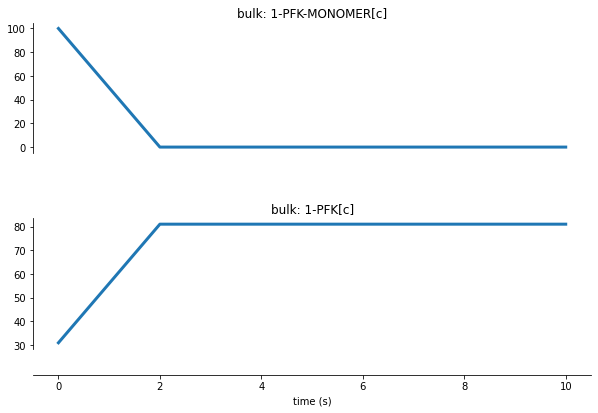

In [11]:
# plot output
cplx_fig = plot_variables(
    cplx_data, 
    variables=[
        ('bulk', '1-PFK-MONOMER[c]'), 
        ('bulk', '1-PFK[c]'), 
    ],
    column_width=10, row_height=3, row_padding=0.5)

Here we see 1-PFK-MONOMER getting complexed. This a relatively fast process and consumes all the monomers in a single time step.

## <u>Transcript Initiation<u/>

In [12]:
from ecoli.processes.transcript_initiation import TranscriptInitiation

# print documentation from process docstring
print(ecoli.processes.transcript_initiation.__doc__)


Transcript Initiation

Transcription initiation sub-model.



In [13]:
# load in parameters
ti_params = load_sim_data.get_transcript_initiation_config()

# initialize process and topology
transcript_initiation = TranscriptInitiation(ti_params)

ti_topology = {
    'environment': ('environment',),
    'full_chromosomes': ('unique', 'full_chromosome'),
    'RNAs': ('unique', 'RNA'),
    'active_RNAPs': ('unique', 'active_RNAP'),
    'promoters': ('unique', 'promoter'),
    'molecules': ('bulk',),
    'listeners': ('listeners',)
}

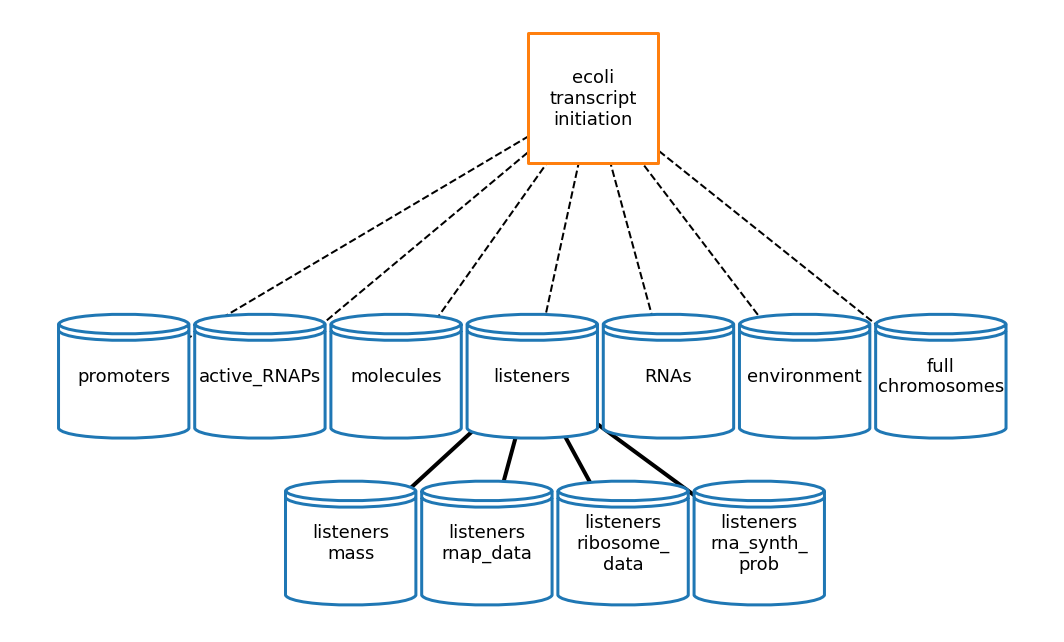

In [14]:
# plot topology
ti_topology_plot_settings = {
    'node_labels': {
        'ecoli-transcript-initiation': 'ecoli\ntranscript\ninitiation',
        'full_chromosomes': 'full\nchromosomes',
        'listeners\nrna_synth_prob': 'listeners\nrna_synth_\nprob',
        'listeners\nribosome_data': 'listeners\nribosome_\ndata',
    },
    'show_ports': False,
    'node_size': 17000,
    'node_distance': 3.3,
    'dashed_edges': True,
    'font_size': 18,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-transcript-initiation': (4, 2)}
}

ti_topology_fig = plot_topology(transcript_initiation, ti_topology_plot_settings)

In [15]:
# display ports schema
pp(transcript_initiation.ports_schema())

{ 'RNAs': { '*': { 'RNAP_index': {'_default': 0, '_updater': 'set'},
                   'TU_index': {'_default': 0, '_updater': 'set'},
                   'can_translate': {'_default': 0, '_updater': 'set'},
                   'is_full_transcript': {'_default': 0, '_updater': 'set'},
                   'is_mRNA': {'_default': 0, '_updater': 'set'},
                   'transcript_length': { '_default': 0,
                                          '_emit': True,
                                          '_updater': 'set'},
                   'unique_index': {'_default': 0, '_updater': 'set'}}},
  'active_RNAPs': { '*': { 'coordinates': { '_default': 0,
                                            '_emit': True,
                                            '_updater': 'set'},
                           'direction': {'_default': 0, '_updater': 'set'},
                           'domain_index': {'_default': 0, '_updater': 'set'},
                           'unique_index': {'_default': 0, '_up

In [16]:
# run simulation and retrieve final data
ti_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': ti_topology}

ti_data = simulate_process(transcript_initiation, ti_settings)

print('\nsimulation output:')
pp(ti_data['bulk'])


Simulation ID: f08f3e4e-fc18-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:29:23
Completed in 4.88 seconds

simulation output:
{ 'APORNAP-CPLX[c]': [2908, 2716, 2537, 2370, 2214, 2068],
  'GUANOSINE-5DP-3DP[c]': [38970, 38970, 38970, 38970, 38970, 38970]}


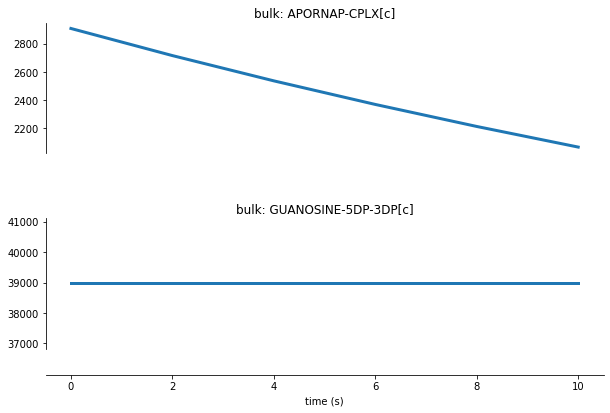

In [17]:
# plot output
ti_fig = plot_variables(
    ti_data, 
    variables=[
        ('bulk', 'APORNAP-CPLX[c]'), 
        ('bulk', 'GUANOSINE-5DP-3DP[c]'),
        ],
    column_width=10, row_height=3, row_padding=0.5)

## <u>Transcript Elongation<u/>

In [18]:
from ecoli.processes.transcript_elongation import TranscriptElongation

# print documentation from process docstring
print(ecoli.processes.transcript_elongation.__doc__)


Transcript Elongation

Transcription elongation sub-model.



In [19]:
# load in parameters
te_params = load_sim_data.get_transcript_elongation_config()

# initialize process and topology
transcript_elongation = TranscriptElongation(te_params)

te_topology = {
    'environment': ('environment',),
    'RNAs': ('unique', 'RNA'),
    'active_RNAPs': ('unique', 'active_RNAP'),
    'molecules': ('bulk',),
    'bulk_RNAs': ('bulk',),
    'ntps': ('bulk',),
    'listeners': ('listeners',)
}

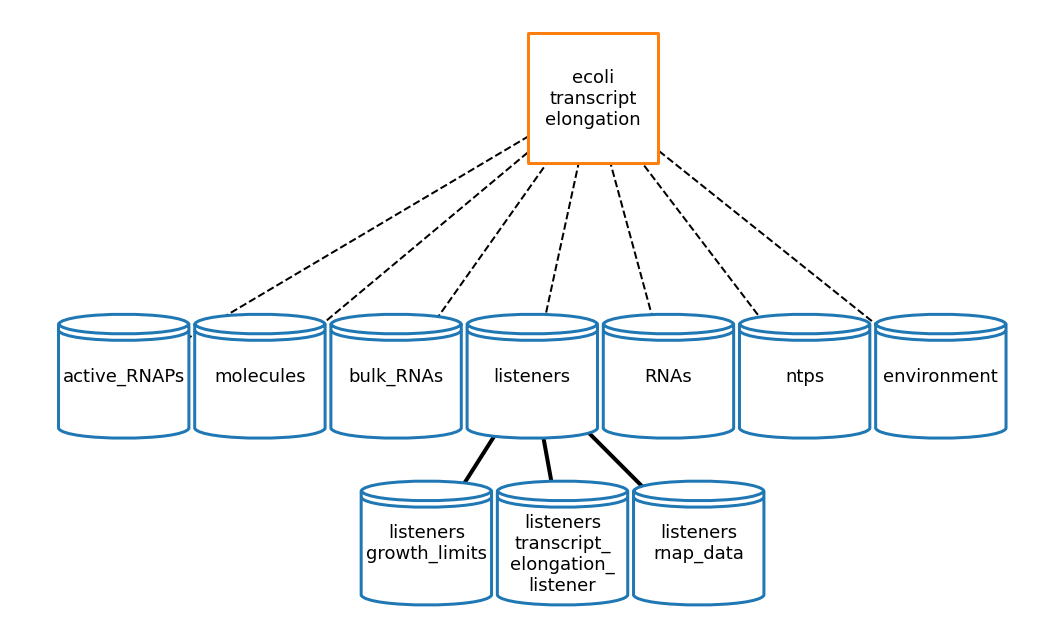

In [20]:
# plot topology
te_topology_plot_settings = {
    'node_labels': {
        'ecoli-transcript-elongation': 'ecoli\ntranscript\nelongation',
        'listeners\ntranscript_elongation_listener': '\nlisteners\ntranscript_\nelongation_\nlistener'
    },
    'show_ports': False,
    'node_size': 17000,
    'node_distance': 3.3,
    'dashed_edges': True,
    'font_size': 18,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-transcript-elongation': (4, 2)}
}

te_topology_fig = plot_topology(transcript_elongation, te_topology_plot_settings)

In [21]:
# display ports schema
pp(transcript_elongation.ports_schema())

{ 'RNAs': { '*': { 'RNAP_index': {'_default': 0, '_updater': 'set'},
                   'TU_index': {'_default': 0, '_updater': 'set'},
                   'can_translate': {'_default': False, '_updater': 'set'},
                   'is_full_transcript': {'_default': False, '_updater': 'set'},
                   'is_mRNA': {'_default': False, '_updater': 'set'},
                   'transcript_length': { '_default': 0,
                                          '_emit': True,
                                          '_updater': 'set'},
                   'unique_index': {'_default': 0, '_updater': 'set'}}},
  'active_RNAPs': { '*': { 'coordinates': { '_default': 0,
                                            '_emit': True,
                                            '_updater': 'set'},
                           'direction': {'_default': 0, '_updater': 'set'},
                           'domain_index': {'_default': 0, '_updater': 'set'},
                           'unique_index': {'_defau

                                     '_properties': {'bulk': True}},
                 'EG10097_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10098_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10099_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10100_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': Tru

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10145_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10146_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10147_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10148_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                 'EG10193_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10194_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10195_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10196_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10197_RNA[c]': { '_default': 0,
            

                 'EG10252_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10253_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10254_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10255_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10256_RNA[c]': { '_default': 0,
            

                 'EG10289_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10290_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10291_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10292_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10293_RNA[c]': { '_default': 0,
            

                                     '_properties': {'bulk': True}},
                 'EG10337_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10338_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10339_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10340_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': Tru

                 'EG10385_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10386_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10387_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10388_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10389_RNA[c]': { '_default': 0,
            

                                     '_properties': {'bulk': True}},
                 'EG10433_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10434_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10435_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10436_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': Tru

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10481_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10482_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10483_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10484_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                 'EG10529_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10530_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10531_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10532_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10533_RNA[c]': { '_default': 0,
            

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10577_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10578_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10579_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10580_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                 'EG10624_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10625_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10626_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10627_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10628_RNA[c]': { '_default': 0,
            

                                     '_properties': {'bulk': True}},
                 'EG10673_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10674_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10675_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10676_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': Tru

                 'EG10721_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10722_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10723_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10724_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10725_RNA[c]': { '_default': 0,
            

                 'EG10815_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10816_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10817_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10818_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10819_RNA[c]': { '_default': 0,
            

                 'EG10865_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10866_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10867_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10868_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10869_RNA[c]': { '_default': 0,
            

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10913_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10914_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10915_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10916_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10978_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10979_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10980_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG10981_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11058_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11059_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11060_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11061_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11129_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11130_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11131_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11132_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11237_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11238_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11239_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11241_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11298_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11299_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11300_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11301_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                 'EG11466_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11467_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11468_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11469_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11470_RNA[c]': { '_default': 0,
            

                 'EG11571_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11572_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11573_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11574_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11575_RNA[c]': { '_default': 0,
            

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11677_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11678_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11679_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11680_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11782_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11783_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11784_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11785_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11894_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11895_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11896_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG11897_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12037_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12038_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12040_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12041_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                     '_properties': {'bulk': True}},
                 'EG12154_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12155_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12158_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12159_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': Tru

                 'EG12269_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12270_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12271_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12272_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12273_RNA[c]': { '_default': 0,
            

                 'EG12378_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12379_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12380_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12381_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12384_RNA[c]': { '_default': 0,
            

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12629_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12630_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12631_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12633_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12859_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12860_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12861_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'EG12865_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                      '_properties': {'bulk': True}},
                 'G0-10449_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-10450_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-10451_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-10452_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-10561_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-10563_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-10567_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-10569_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': T

                 'G0-16664_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-16665_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-16666_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-16667_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'G0-16668_RNA[c]': { '_default'

                 'G0-8896_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'G0-8898_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'G0-8900_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'G0-8902_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'G0-8903_RNA[c]': { '_default': 0,
            

                                   '_properties': {'bulk': True}},
                 'G6116_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6117_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6118_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6119_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6120_RNA[c

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6188_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6189_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6190_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6191_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_

                                   '_properties': {'bulk': True}},
                 'G6259_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6260_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6261_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6262_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6263_RNA[c

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6332_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6333_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6334_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6335_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_propertie

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6421_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6422_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6423_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6424_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_propertie

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6461_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6462_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6463_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6464_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_propertie

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6559_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6560_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6561_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6562_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6597_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6598_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6599_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6600_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6646_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6647_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6648_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6649_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_propertie

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6706_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6708_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6709_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6710_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_propertie

                 'G6758_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6759_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6760_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6761_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6762_RNA[c]': { '_default': 0,
                                   '_divider':

                 'G6837_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6838_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6839_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6840_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6841_RNA[c]': { '_default': 0,
                                   '_divider':

                                   '_properties': {'bulk': True}},
                 'G6885_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6886_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6887_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6888_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6889_RNA[c

                 'G6983_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6984_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6985_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6986_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G6987_RNA[c]': { '_default': 0,
                                   '_divider':

                 'G7082_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7083_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7084_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7085_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7086_RNA[c]': { '_default': 0,
                                   '_divider':

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7196_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7197_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7198_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7199_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_

                 'G7274_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7275_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7276_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7277_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7278_RNA[c]': { '_default': 0,
                                   '_divider':

                 'G7368_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7369_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7370_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7371_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7372_RNA[c]': { '_default': 0,
                                   '_divider':

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7461_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7462_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7463_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7464_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_

                 'G7563_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7564_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7565_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7566_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7567_RNA[c]': { '_default': 0,
                                   '_divider':

                 'G7609_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7610_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7611_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7612_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7613_RNA[c]': { '_default': 0,
                                   '_divider':

                 'G7673_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7674_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7675_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7676_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7677_RNA[c]': { '_default': 0,
                                   '_divider':

                                   '_properties': {'bulk': True}},
                 'G7777_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7789_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7798_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7800_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7802_RNA[c

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7862_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7863_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7864_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7865_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_

                 'G7912_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7913_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7914_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7915_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G7916_RNA[c]': { '_default': 0,
                                   '_divider':

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G8221_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'G85_RNA[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'GB4478_RNA[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'GCVB-RNA[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bu

                                  '_properties': {'bulk': True}},
                 'RNA0-331[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                 'RNA0-332[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                 'RNA0-333[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                 'RNA0-334[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                 'RNA0-348[c]': { '_default': 

                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'RRLE-RRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'RRLG-RRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'RRLH-RRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'RRSA-RRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_propertie

                 'argY-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'argZ-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'asnT-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'asnU-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'asnV-tRNA[c]': { '_default': 0,
                                   '_divider':

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'tyrV-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'valT-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'valU-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'valV-tRNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_

In [22]:
# run simulation and retrieve final data
te_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': te_topology}

te_data = simulate_process(transcript_elongation, te_settings)

print('\nsimulation output:')
pp(te_data['bulk'])


Simulation ID: 021d4ba6-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:29:52


/Users/abhinavkumar/.pyenv/versions/3.8.5/envs/v-ecoli/lib/python3.8/site-packages/vivarium_core-0.3.1-py3.8.egg/vivarium/core/engine.py:362: UserWarning: configuration size is too big for the emitter, discarding process parameters
  warnings.warn('configuration size is too big for the emitter, '


Completed in 9.90 seconds

simulation output:
{ '6S-RNA[c]': [0, 0, 0, 0, 0, 0],
  'APORNAP-CPLX[c]': [2908, 3102, 3155, 3207, 3255, 3308],
  'ATP[c]': [7866030, 7843096, 7823624, 7805668, 7788523, 7772721],
  'C0730-RNA[c]': [0, 0, 0, 0, 0, 0],
  'CSRB-RNA[c]': [0, 0, 0, 0, 0, 0],
  'CSRC-RNA[c]': [0, 0, 0, 0, 0, 0],
  'CTP[c]': [1467018, 1445311, 1427640, 1411019, 1395538, 1380991],
  'DICF-RNA[c]': [0, 0, 0, 0, 0, 0],
  'DSRA-RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10001_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10002_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10003_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10004_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10006_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10007_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10008_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10010_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10011_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10012_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10013_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10014_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10015_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10016_RNA[c]'

  'EG10558_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10559_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10560_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10561_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10562_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10563_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10564_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10565_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10566_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10567_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10568_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10569_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10570_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10571_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10572_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10573_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10574_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10575_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10576_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10577_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10578_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10579_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10580_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10581_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10582_RNA[c]': [0, 0, 0, 0, 0, 0],


  'EG11063_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11064_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11065_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11066_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11067_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11068_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11069_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11070_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11071_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11072_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11073_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11074_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11075_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11076_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11078_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11079_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11080_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11081_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11082_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11083_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11084_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11085_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11086_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11087_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11088_RNA[c]': [0, 0, 0, 0, 0, 0],


  'EG11829_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11830_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11831_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11832_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11833_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11835_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11836_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11837_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11838_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11839_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11840_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11841_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11842_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11843_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11844_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11845_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11846_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11847_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11848_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11849_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11850_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11851_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11852_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11853_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11854_RNA[c]': [0, 0, 0, 0, 0, 0],


  'EG12164_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12165_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12166_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12167_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12168_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12169_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12171_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12172_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12173_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12176_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12177_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12178_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12179_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12180_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12181_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12182_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12183_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12188_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12189_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12190_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12191_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12192_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12193_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12194_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12195_RNA[c]': [0, 0, 0, 0, 0, 0],


  'G198_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G1_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G2000_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G2001_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G2002_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G357_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G358_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G359_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G360_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G361_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G362_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G363_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G364_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G365_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G366_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G369_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G36_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G370_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G372_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G377_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G378_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G379_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G436_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G495_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G58_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G592_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6081_RNA[c]': [0, 0, 0, 0, 0, 0],
 

  'G6654_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6655_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6656_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6657_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6658_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6659_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6660_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6661_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6662_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6663_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6664_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6665_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6666_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6667_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6668_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6669_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6670_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6671_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6672_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6673_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6674_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6675_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6676_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6677_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6678_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6679_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6680_RNA

  'G7190_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7191_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7192_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7193_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7194_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7195_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7196_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7197_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7198_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7199_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7200_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7201_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7202_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7203_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7204_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7205_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7206_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7207_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7209_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7210_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7211_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7212_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7213_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7214_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7215_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7216_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7217_RNA

  'G7734_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7735_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7736_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7737_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7738_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7739_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7740_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7741_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7742_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7743_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7744_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7745_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7746_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7747_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7748_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7750_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7751_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7752_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7753_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7756_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7757_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7758_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7759_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7761_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7762_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7763_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7767_RNA

In [23]:
# # plot output
# te_fig = plot_variables(
#     te_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>TF Binding<u/>

In [24]:
from ecoli.processes.tf_binding import TfBinding

# print documentation from process docstring
print(ecoli.processes.tf_binding.__doc__)


Tf Binding

Bind transcription factors to DNA.



In [25]:
# load in parameters
tfb_params = load_sim_data.get_tf_config()

# initialize process and topology
tf_binding = TfBinding(tfb_params)

tfb_topology = {
    'promoters': ('unique', 'promoter'),
    'active_tfs': ('bulk',),
    'inactive_tfs': ('bulk',),
    'listeners': ('listeners',)
}

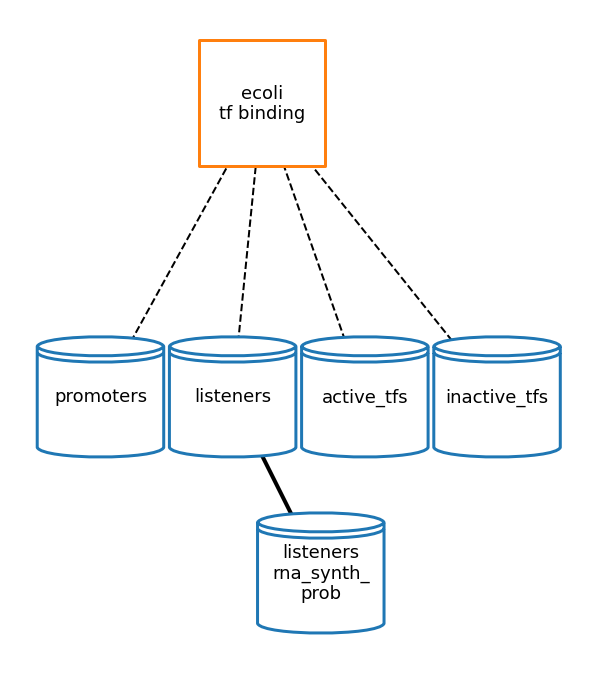

In [26]:
# plot topology
tfb_topology_plot_settings = {
    'node_labels': {
        'ecoli-tf-binding': 'ecoli\ntf binding',
        'listeners\nrna_synth_prob': 'listeners\nrna_synth_\nprob',
    },
    'show_ports': False,
    'node_size': 16000,
    'node_distance': 3.5,
    'dashed_edges': True,
    'font_size': 18,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-tf-binding': (2, 2)}
}

tfb_topology_fig = plot_topology(tf_binding, tfb_topology_plot_settings)

In [27]:
# display ports schema
pp(tf_binding.ports_schema())

{ 'active_tfs': { 'CPLX-125[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                  'CPLX-172[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                  'CPLX0-226[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                  'CPLX0-228[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                  'CPLX0-7669[c]': { '_default': 0,
                                    

In [28]:
# run simulation and retrieve final data
tfb_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': tfb_topology}

tfb_data = simulate_process(tf_binding, tfb_settings)

print('\nsimulation output:')
pp(tfb_data['bulk'])


Simulation ID: 17e69ad2-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:30:27
Completed in 6.10 seconds

simulation output:
{ 'ARCA-MONOMER[c]': [2769, 2769, 2769, 2769, 2769, 2769],
  'BAER-MONOMER[c]': [200, 200, 200, 200, 200, 200],
  'BASR-MONOMER[c]': [180, 180, 180, 180, 180, 180],
  'CPLX-125[c]': [7, 9, 8, 6, 9, 9],
  'CPLX-172[c]': [0, 0, 0, 0, 0, 0],
  'CPLX0-226[c]': [139, 134, 131, 139, 141, 132],
  'CPLX0-228[c]': [13, 11, 10, 8, 13, 10],
  'CPLX0-7669[c]': [89, 88, 86, 88, 87, 89],
  'CPLX0-7670[c]': [186, 186, 186, 186, 186, 186],
  'CPLX0-7705[c]': [5742, 5742, 5742, 5742, 5742, 5742],
  'CPLX0-7740[c]': [12, 12, 12, 12, 12, 12],
  'CPLX0-7796APO[c]': [155, 155, 155, 155, 155, 155],
  'CPLX0-7796[c]': [475, 479, 476, 474, 477, 476],
  'CPLX0-7797[c]': [1186, 1186, 1186, 1186, 1186, 1186],
  'CPLX0-7916[c]': [468, 468, 468, 468, 468, 468],
  'CPLX0-8051[c]': [0, 0, 0, 0, 0, 0],
  'DCUR-MONOMER[c]': [80, 80, 80, 80, 80, 80],
  'EG12123-MONOMER[c]': [237, 237, 237, 

In [29]:
# # plot output
# tfb_fig = plot_variables(
#     tfb_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>Chromosome Replication<u/>

In [30]:
from ecoli.processes.chromosome_replication import ChromosomeReplication

# print documentation from process docstring
print(ecoli.processes.chromosome_replication.__doc__)


Chromosome Replication

Process for chromosome replication. Performs initiation, elongation, and
termination of active partial chromosomes that replicate the chromosome.



In [31]:
# load in parameters
cr_params = load_sim_data.get_chromosome_replication_config()

# initialize process and topology
chromosome_replication = ChromosomeReplication(cr_params)

cr_topology = {
    # bulk molecules
    'replisome_trimers': ('bulk',),
    'replisome_monomers': ('bulk',),
    'dntps': ('bulk',),
    'ppi': ('bulk',),

    # unique molecules
    'active_replisomes': ('unique', 'active_replisome',),
    'oriCs': ('unique', 'oriC',),
    'chromosome_domains': ('unique', 'chromosome_domain',),
    'full_chromosomes': ('unique', 'full_chromosome',),

    # other
    'listeners': ('listeners',),
    'environment': ('environment',),
}

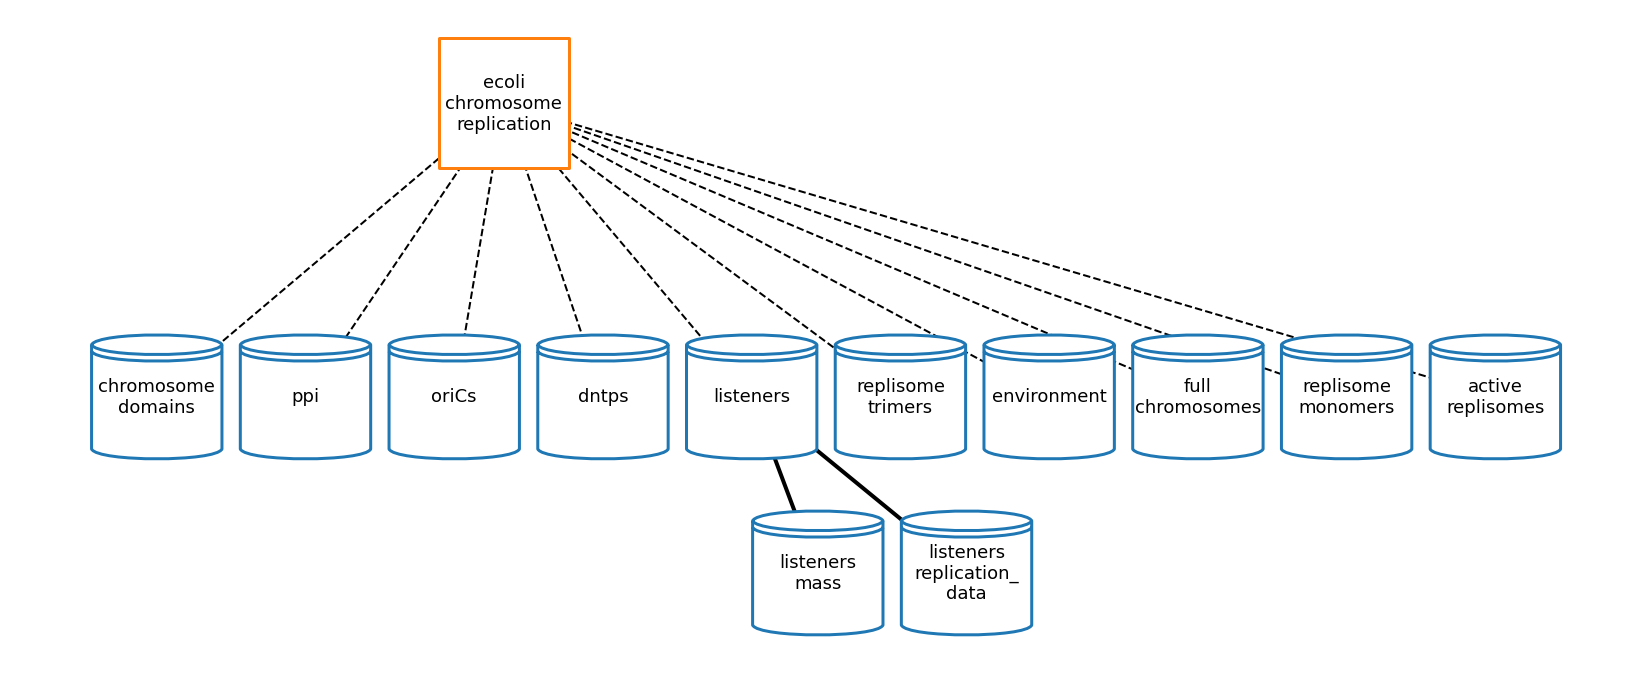

In [32]:
# plot topology
cr_topology_plot_settings = {
    'node_labels': {
        'ecoli-chromosome_replication': 'ecoli\nchromosome\nreplication',
        'replisome_trimers': 'replisome\ntrimers',
        'replisome_monomers': 'replisome\nmonomers',
        'active_replisomes': 'active\nreplisomes',
        'full_chromosomes': 'full\nchromosomes',
        'chromosome_domains': 'chromosome\ndomains',
        'listeners\nreplication_data': 'listeners\nreplication_\ndata'
    },
    'show_ports': False,
    'node_size': 17000,
    'node_distance': 3.5,
    'dashed_edges': True,
    'font_size': 18,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-chromosome_replication': (3, 2)}
}

cr_topology_fig = plot_topology(chromosome_replication, cr_topology_plot_settings)

In [33]:
# display ports schema
pp(chromosome_replication.ports_schema())

{ 'active_replisomes': { '*': { 'coordinates': { '_default': 0,
                                                 '_emit': True,
                                                 '_updater': 'set'},
                                'dna_mass': { '_default': 0,
                                              '_updater': 'accumulate'},
                                'domain_index': { '_default': 0,
                                                  '_emit': True,
                                                  '_updater': 'set'},
                                'right_replichore': { '_default': 0,
                                                      '_emit': True,
                                                      '_updater': 'set'}}},
  'chromosome_domains': { '*': { 'child_domains': { '_default': 0,
                                                    '_emit': True,
                                                    '_updater': 'set'},
                                 'domain_index': 

In [34]:
# run simulation and retrieve final data
cr_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': cr_topology}

cr_data = simulate_process(chromosome_replication, cr_settings)

print('\nsimulation output:')
pp(cr_data['bulk'])


Simulation ID: 1e91ef1c-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:30:38
Completed in 0.377004 seconds

simulation output:
{ 'CPLX0-2361[c]': [398, 398, 398, 398, 398, 398],
  'CPLX0-3621[c]': [238, 238, 238, 238, 238, 238],
  'CPLX0-3761[c]': [111, 111, 111, 111, 111, 111],
  'DATP[c]': [12661, 10716, 8791, 6886, 4816, 3002],
  'DCTP[c]': [28181, 26258, 24315, 22352, 20554, 18500],
  'DGTP[c]': [12661, 10738, 8795, 6832, 5034, 2980],
  'EG10239-MONOMER[c]': [34, 34, 34, 34, 34, 34],
  'EG11412-MONOMER[c]': [55, 55, 55, 55, 55, 55],
  'EG11500-MONOMER[c]': [26, 26, 26, 26, 26, 26],
  'PPI[c]': [408413, 416149, 423885, 431621, 439357, 447093],
  'TTP[c]': [3773734, 3771789, 3769864, 3767959, 3765889, 3764075]}


In [35]:
# # plot output
# cr_fig = plot_variables(
#     cr_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>Polypeptide Initiation<u/>

In [36]:
from ecoli.processes.polypeptide_initiation import PolypeptideInitiation

# print documentation from process docstring
print(ecoli.processes.polypeptide_initiation.__doc__)


Polypeptide Initiation

Polypeptide initiation sub-model.



In [37]:
# load in parameters
pi_params = load_sim_data.get_polypeptide_initiation_config()

# initialize process and topology
polypeptide_initiation = PolypeptideInitiation(pi_params)

pi_topology = {
    'environment': ('environment',),
    'listeners': ('listeners',),
    'active_ribosome': ('unique', 'active_ribosome'),
    'RNA': ('unique', 'RNA'),
    'subunits': ('bulk',)
}

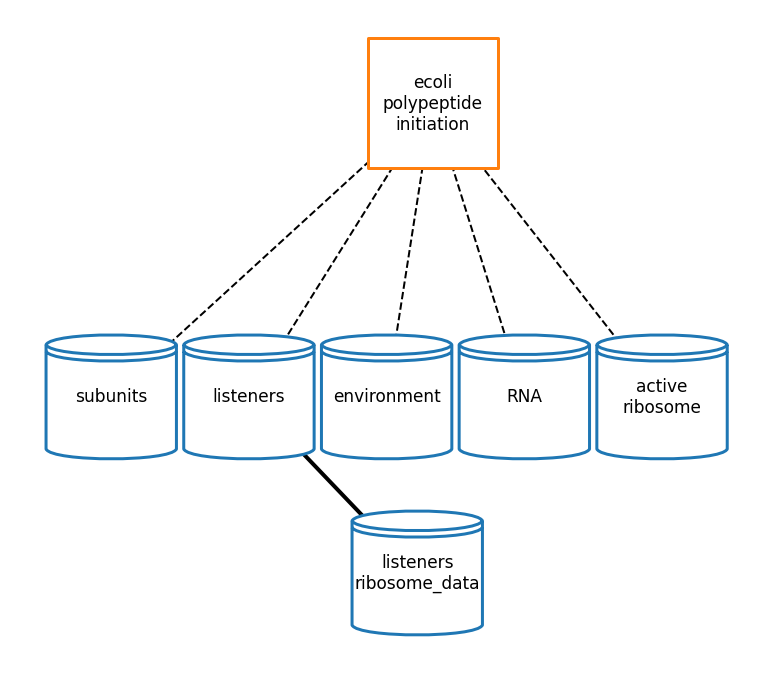

In [38]:
# plot topology
pi_topology_plot_settings = {
    'node_labels': {
        'ecoli-polypeptide-initiation': 'ecoli\npolypeptide\ninitiation',
        'active_ribosome': 'active\nribosome'
    },
    'show_ports': False,
    'node_size': 17000,
    'node_distance': 3.5,
    'dashed_edges': True,
    'font_size': 17,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-polypeptide-initiation': (3, 2)}
}

pi_topology_fig = plot_topology(polypeptide_initiation, pi_topology_plot_settings)

In [39]:
# display ports schema
pp(polypeptide_initiation.ports_schema())

{ 'RNA': { '*': { 'TU_index': {'_default': 0},
                  'can_translate': {'_default': False},
                  'unique_index': {'_default': 0}}},
  'active_ribosome': { '*': { 'mRNA_index': {'_default': 0},
                              'peptide_length': {'_default': 0, '_emit': True},
                              'pos_on_mRNA': {'_default': 0, '_emit': True},
                              'protein_index': {'_default': 0},
                              'unique_index': {'_default': 0}}},
  'environment': {'media_id': {'_default': '', '_updater': 'set'}},
  'listeners': { 'ribosome_data': { 'effective_elongation_rate': { '_default': 0.0,
                                                                   '_emit': True,
                                                                   '_updater': 'set'},
                                    'prob_translation_per_transcript': { '_default': [ ],
                                                                         '_emit': True

In [40]:
# run simulation and retrieve final data
pi_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': pi_topology}

pi_data = simulate_process(polypeptide_initiation, pi_settings)

print('\nsimulation output:')
pp(pi_data['bulk'])


Simulation ID: 20c5c696-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:30:43
Completed in 4.88 seconds

simulation output:
{ 'CPLX0-3953[c]': [2896, 0, 0, 0, 0, 0],
  'CPLX0-3962[c]': [3290, 394, 394, 394, 394, 394]}


In [41]:
# # plot output
# pi_fig = plot_variables(
#     pi_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>Polypeptide Elongation<u/>

In [42]:
from ecoli.processes.polypeptide_elongation import PolypeptideElongation

# print documentation from process docstring
print(ecoli.processes.polypeptide_elongation.__doc__)


Polypeptide Elongation

Translation sub-model for protein synthesis by ribosome.



In [43]:
# load in parameters
pe_params = load_sim_data.get_polypeptide_elongation_config()

# initialize process and topology
polypeptide_elongation = PolypeptideElongation(pe_params)

pe_topology = {
    'environment': ('environment',),
    'listeners': ('listeners',),
    'active_ribosome': ('unique', 'active_ribosome'),
    'molecules': ('bulk',),
    'monomers': ('bulk',),
    'amino_acids': ('bulk',),
    'ppgpp_reaction_metabolites': ('bulk',),
    'uncharged_trna': ('bulk',),
    'charged_trna': ('bulk',),
    'charging_molecules': ('bulk',),
    'synthetases': ('bulk',),
    'subunits': ('bulk',),
    'polypeptide_elongation': ('process_state', 'polypeptide_elongation')
}

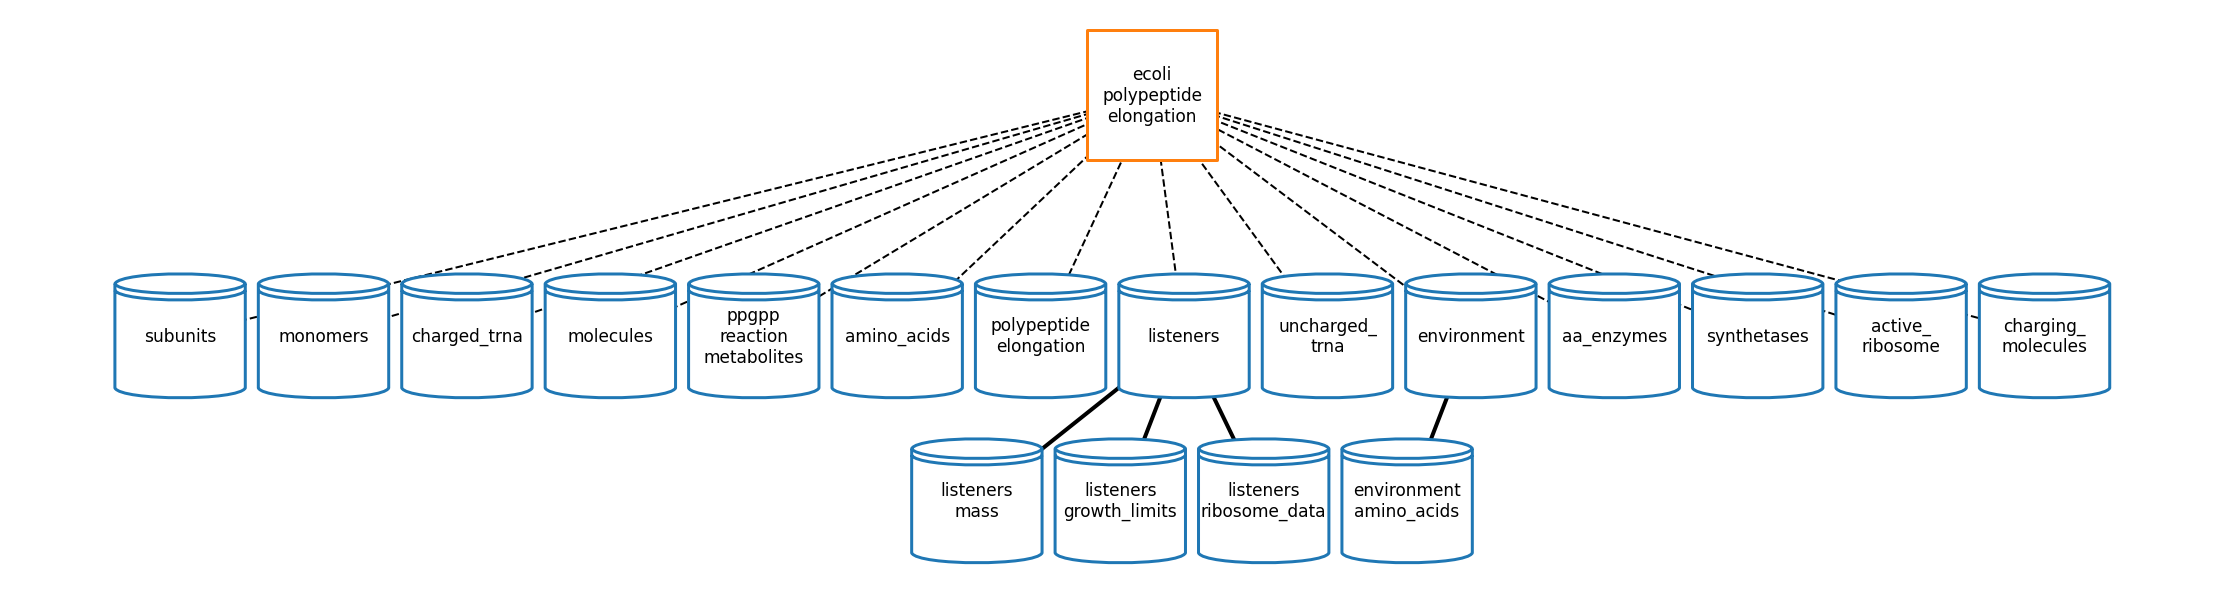

In [44]:
# plot topology
pe_topology_plot_settings = {
    'node_labels': {
        'ecoli-polypeptide-elongation': 'ecoli\npolypeptide\nelongation',
        'uncharged_trna': 'uncharged_\ntrna',
        'charging_molecules': 'charging_\nmolecules',
        'active_ribosome': 'active_\nribosome',
        'polypeptide_elongation': 'polypeptide\nelongation',
        'ppgpp_reaction_metabolites': 'ppgpp\nreaction\nmetabolites',
        'chromosome_domains': 'chromosome\ndomains',
        'listeners\nreplication_data': 'listeners\nreplication_\ndata'
    },
    'show_ports': False,
    'node_size': 17000,
    'node_distance': 3.3,
    'dashed_edges': True,
    'font_size': 17,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-polypeptide-elongation': (7, 1.75)}
}

pe_topology_fig = plot_topology(polypeptide_elongation, pe_topology_plot_settings)

In [45]:
# display ports schema
pp(polypeptide_elongation.ports_schema())

{ 'aa_enzymes': { '2-ISOPROPYLMALATESYN-MONOMER[c]': { '_default': 0,
                                                       '_divider': 'binomial',
                                                       '_emit': True,
                                                       '_properties': { 'bulk': True}},
                  'ACETOLACTSYNI-CPLX[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                  'ANTHRANSYN-CPLX[c]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                  'ASNSYNA-CPLX[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
  

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                          'MET[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                          'PHE[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                          'PPI[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                          'PRO[c]': { '_default': 0,
                                      '_divider'

                                                    '_properties': { 'bulk': True}},
                          'charged-leuU-tRNA[c]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True,
                                                    '_properties': { 'bulk': True}},
                          'charged-leuV-tRNA[c]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True,
                                                    '_properties': { 'bulk': True}},
                          'charged-leuW-tRNA[c]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True,
                                                    '_properties': { 'bulk': True}},
                          'cha

                                    'ASN': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                                    'CYS': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                                    'GLN': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                                    'GLT': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
             

                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                'ACYLCOADEHYDROG-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                'ACYLCOASYN-MONOMER[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                'ADCLY-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'ADENODEAMIN-MON

                                      '_properties': {'bulk': True}},
                'B0511-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'B0612-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'B0709-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'B0752-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                'CYANLY-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                'CYCA-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'CYCLASE-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'CYDA-MONOMER[i]': { '_default': 0,
                                     '

                'EG10113-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10114-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10116-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10119-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10473-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10474-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10481-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10483-MONOMER[i]': { '_default': 0,
                

                'EG10825-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10826-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10827-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10828-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11009-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11010-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11011-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11012-MONOMER[m]': { '_default': 0,
                

                                        '_properties': {'bulk': True}},
                'EG11181-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11182-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11183-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11184-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                                        '_properties': {'bulk': True}},
                'EG11352-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11353-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11354-MONOMER[p]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11355-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                                        '_properties': {'bulk': True}},
                'EG11536-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11537-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11538-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11544-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11748-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11749-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11750-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11757-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                

                                        '_properties': {'bulk': True}},
                'EG11900-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11901-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11902-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11903-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12094-MONOMER[p]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12096-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12097-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12098-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                

                'EG12246-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12247-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12248-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12251-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                'EG12421-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12422-MONOMER[p]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12424-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12428-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'EVGA-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'EVGS-MONOMER[m]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'EXUT-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'F16B-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
            

                                      '_properties': {'bulk': True}},
                'G6088-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6093-MONOMER[o]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6095-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6096-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6178-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6180-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6181-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6182-MONOMER[i]': { '_default': 0,
                                      '_divider'

                'G6351-MONOMER[e]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6352-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6353-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6354-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6355-MONOMER[i]': { '_default'

                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6481-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6482-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6483-MONOMER[e]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6484-MONOMER[e]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': T

                'G6606-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6607-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6608-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6611-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6612-MONOMER[m]': { '_default'

                'G6710-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6711-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6712-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6713-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6714-MONOMER[c]': { '_default'

                'G6838-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6839-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6840-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6841-MONOMER[o]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6843-MONOMER[c]': { '_default'

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6956-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6957-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6958-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6959-MONOMER[c]': { '_default': 0,
                                      '_divider'

                'G7089-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7090-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7093-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7094-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7095-MONOMER[c]': { '_default'

                'G7230-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7231-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7232-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7233-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7234-MONOMER[c]': { '_default'

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7362-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7363-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7364-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7365-MONOMER[c]': { '_default': 0,
                                      '_divider'

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7497-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7498-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7499-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7500-MONOMER[i]': { '_default': 0,
                                      '_divider'

                'G7649-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7650-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7651-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7652-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7653-MONOMER[c]': { '_default'

                'G7763-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7767-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7769-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7776-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7777-MONOMER[c]': { '_default'

                'G7931-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7932-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7933-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7936-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7937-MONOMER[c]': { '_default'

                                       '_properties': {'bulk': True}},
                'GLYOXII-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'GLYQ-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'GLYS-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'GMP-REDUCT-MONOMER[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                

                'MALE-MONOMER[p]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'MALF-MONOMER[m]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'MALG-MONOMER[m]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'MALIC-NAD-MONOMER[c]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                'MALIC-NADP-MONOMER[c]': { '

                                      '_properties': {'bulk': True}},
                'MONOMER0-2670[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2671[o]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2672[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2673[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                                      '_properties': {'bulk': True}},
                'MONOMER0-4232[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-4233[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-4234[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-4235[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                'MONOMER0-4502[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-4503[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-4504[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-4505[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-4506[c]': { '_default'

                'O-SUCCHOMOSERLYASE-MONOMER[c]': { '_default': 0,
                                                   '_divider': 'binomial',
                                                   '_emit': True,
                                                   '_properties': { 'bulk': True}},
                'O-SUCCINYLBENZOATE-COA-LIG-MONOMER[c]': { '_default': 0,
                                                           '_divider': 'binomial',
                                                           '_emit': True,
                                                           '_properties': { 'bulk': True}},
                'O-SUCCINYLBENZOATE-COA-SYN-MONOMER[c]': { '_default': 0,
                                                           '_divider': 'binomial',
                                                           '_emit': True,
                                                           '_properties': { 'bulk': True}},
                'OCTAPRENYL-METHOXYPHENOL-OH-MONOMER[c]': { '_d

                'PD04418[c]': { '_default': 0,
                                '_divider': 'binomial',
                                '_emit': True,
                                '_properties': {'bulk': True}},
                'PDXA-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'PDXH-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'PDXJ-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'PDXK-MONOMER[c]': { '_default': 0,
                                

                'RFBX-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'RFFTRANS-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                'RHAMNISOM-MONOMER[c]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                'RHAMNULOKIN-MONOMER[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True,
                                            '_properties': {'bulk': True}},


                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'THIF-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'THIG-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'THIH-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'THII-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
   

                                     '_properties': {'bulk': True}},
                'YBAL-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YBBA-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YBBL-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YBBP-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': Tru

                'YJCH-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YJCQ-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YJCV-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YJCW-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YJCX-MONOMER[p]': { '_default': 0,
            

                                        '_properties': {'bulk': True}},
                      'glnX-tRNA[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                      'gltT-tRNA[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                      'gltU-tRNA[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                      'gltV-tRNA[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

In [46]:
# run simulation and retrieve final data
pe_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': pe_topology}

pe_data = simulate_process(polypeptide_elongation, pe_settings)

print('\nsimulation output:')
pp(pe_data['bulk'])


Simulation ID: 2c852b66-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:31:04
Completed in 14.54 seconds

simulation output:
{ '1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]': [129, 129, 129, 129, 129, 129],
  '1-PFK-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  '2-DEHYDROPANTOATE-REDUCT-MONOMER[c]': [245, 245, 245, 245, 245, 245],
  '2-ISOPROPYLMALATESYN-MONOMER[c]': [1604, 1604, 1604, 1604, 1604, 1604],
  '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]': [702, 702, 702, 702, 702, 702],
  '2-OCTAPRENYLPHENOL-HYDROX-MONOMER[i]': [42, 42, 42, 42, 42, 42],
  '3-CH3-2-OXOBUTANOATE-OH-CH3-XFER-MONOMER[c]': [5, 6, 8, 11, 15, 21],
  '3-ISOPROPYLMALDEHYDROG-MONOMER[c]': [0, 2, 5, 9, 14, 20],
  '3-OXOACYL-ACP-REDUCT-MONOMER[c]': [2, 5, 10, 15, 21, 28],
  '3-OXOACYL-ACP-SYNTHII-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  '4OHBENZOATE-OCTAPRENYLTRANSFER-MONOMER[i]': [94, 94, 94, 94, 94, 94],
  '6PFK-1-MONOMER[c]': [0, 0, 1, 2, 4, 7],
  '6PFK-2-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  '6PGLUCONDEHYDROG-MONOMER[c]': [1, 4

  'EG10747-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'EG10748-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'EG10757-MONOMER[p]': [1047, 1047, 1050, 1053, 1058, 1063],
  'EG10758-MONOMER[c]': [9277, 9282, 9291, 9304, 9318, 9336],
  'EG10760-MONOMER[p]': [503, 503, 505, 507, 509, 511],
  'EG10761-MONOMER[c]': [556, 557, 558, 560, 564, 569],
  'EG10762-MONOMER[c]': [2095, 2096, 2097, 2099, 2102, 2105],
  'EG10763-MONOMER[c]': [52, 52, 52, 52, 52, 54],
  'EG10764-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'EG10765-MONOMER[c]': [48, 48, 48, 48, 48, 48],
  'EG10776-MONOMER[i]': [1067, 1068, 1070, 1073, 1076, 1079],
  'EG10777-MONOMER[i]': [92, 92, 93, 94, 95, 96],
  'EG10778-MONOMER[i]': [130, 130, 130, 130, 130, 130],
  'EG10779-MONOMER[i]': [39, 39, 39, 39, 39, 39],
  'EG10780-MONOMER[p]': [482, 482, 482, 482, 482, 482],
  'EG10785-MONOMER[c]': [175, 175, 175, 175, 175, 175],
  'EG10786-MONOMER[c]': [85, 85, 85, 85, 85, 85],
  'EG10812-MONOMER[c]': [127, 127, 127, 127, 127, 127],
  'EG10813-MONOMER[c]': [19, 19, 1

  'EG11639-MONOMER[i]': [116, 116, 116, 116, 116, 116],
  'EG11643-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'EG11644-MONOMER[p]': [34, 34, 34, 34, 34, 34],
  'EG11645-MONOMER[c]': [25, 25, 25, 25, 25, 25],
  'EG11646-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'EG11649-MONOMER[c]': [116, 116, 116, 116, 116, 116],
  'EG11650-MONOMER[c]': [182, 182, 182, 182, 182, 182],
  'EG11651-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'EG11652-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'EG11653-MONOMER[c]': [342, 343, 344, 345, 346, 347],
  'EG11656-MONOMER[c]': [9, 10, 11, 13, 17, 21],
  'EG11659-MONOMER[i]': [1761, 1761, 1761, 1761, 1761, 1761],
  'EG11660-MONOMER[i]': [162, 162, 162, 162, 162, 162],
  'EG11661-MONOMER[c]': [525, 525, 525, 525, 525, 525],
  'EG11662-MONOMER[c]': [9, 9, 9, 9, 9, 9],
  'EG11663-MONOMER[c]': [7, 8, 10, 17, 31, 46],
  'EG11664-MONOMER[c]': [293, 294, 296, 298, 300, 302],
  'EG11665-MONOMER[i]': [141, 141, 141, 141, 141, 141],
  'EG11666-MONOMER[c]': [2, 2, 2, 2, 5, 9],
  'EG11671-MONOMER[i]': [2, 2

  'FRUCTBISALD-CLASSII-MONOMER[c]': [4, 7, 16, 30, 57, 90],
  'FRVA-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'FRVB-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'FRWB-MONOMER[i]': [6, 6, 6, 6, 6, 6],
  'FRWC-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'FSR-MONOMER[i]': [206, 206, 207, 209, 211, 214],
  'FTSE-MONOMER[m]': [20, 20, 20, 20, 20, 20],
  'FTSX-MONOMER[o]': [0, 0, 0, 0, 0, 0],
  'FUC4NACTRANS-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'FUCISOM-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'FUCP-MONOMER[i]': [2, 2, 2, 2, 2, 2],
  'FUCPALDOL-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'FUCULOKIN-MONOMER[c]': [24, 24, 24, 24, 24, 24],
  'FUM-FE-S[c]': [13, 13, 13, 13, 13, 13],
  'FUM-FLAVO[c]': [75, 75, 75, 75, 75, 75],
  'FUM-MEMB1[i]': [0, 0, 0, 0, 0, 0],
  'FUM-MEMB2[i]': [25, 25, 25, 25, 25, 25],
  'FUMA-MONOMER[c]': [0, 0, 1, 2, 3, 5],
  'FUMB-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'FUMC-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G357-MONOMER[p]': [1347, 1347, 1347, 1348, 1350, 1353],
  'G360-MONOMER[c]': [4953, 4954, 4959, 4965, 4974, 4

  'G6901-MONOMER[c]': [3, 3, 3, 3, 3, 3],
  'G6902-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G6903-MONOMER[c]': [587, 587, 587, 587, 587, 587],
  'G6904-MONOMER[p]': [190, 190, 190, 190, 190, 190],
  'G6905-MONOMER[c]': [828, 828, 828, 829, 830, 832],
  'G6906-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G6907-MONOMER[c]': [169, 169, 169, 169, 169, 169],
  'G6908-MONOMER[c]': [0, 0, 1, 2, 3, 5],
  'G6909-MONOMER[c]': [54, 54, 54, 54, 54, 54],
  'G6911-MONOMER[c]': [2159, 2159, 2160, 2161, 2162, 2163],
  'G6912-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'G6913-MONOMER[c]': [482, 482, 482, 482, 482, 482],
  'G6914-MONOMER[i]': [122, 122, 122, 122, 122, 122],
  'G6915-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'G6918-MONOMER[c]': [11, 11, 11, 11, 11, 11],
  'G6919-MONOMER[c]': [22, 22, 22, 22, 22, 22],
  'G6920-MONOMER[c]': [5, 5, 5, 5, 5, 5],
  'G6921-MONOMER[i]': [9, 9, 9, 9, 9, 9],
  'G6922-MONOMER[c]': [11, 11, 11, 11, 11, 11],
  'G6923-MONOMER[c]': [4, 4, 4, 4, 4, 4],
  'G6924-MONOMER[c]': [135, 135, 135, 135, 135

  'G7727-MONOMER[c]': [134, 134, 134, 134, 134, 134],
  'G7728-MONOMER[c]': [8, 8, 8, 8, 8, 8],
  'G7729-MONOMER[i]': [5, 5, 5, 5, 5, 5],
  'G7730-MONOMER[m]': [36, 36, 36, 36, 36, 36],
  'G7731-MONOMER[i]': [9, 9, 9, 9, 9, 9],
  'G7732-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'G7733-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G7734-MONOMER[c]': [21, 21, 21, 21, 21, 21],
  'G7735-MONOMER[c]': [18, 18, 18, 18, 18, 18],
  'G7736-MONOMER[c]': [7, 7, 7, 7, 7, 7],
  'G7737-MONOMER[m]': [6, 6, 6, 6, 6, 6],
  'G7738-MONOMER[m]': [4, 4, 4, 4, 4, 4],
  'G7739-MONOMER[c]': [18, 18, 18, 18, 18, 18],
  'G7740-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G7741-MONOMER[i]': [47, 47, 47, 47, 47, 47],
  'G7742-MONOMER[c]': [207, 207, 208, 210, 212, 214],
  'G7743-MONOMER[c]': [80, 80, 80, 80, 80, 80],
  'G7744-MONOMER[c]': [762, 763, 765, 768, 772, 776],
  'G7745-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'G7746-MONOMER[c]': [817, 817, 817, 817, 817, 817],
  'G7747-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G7748-MONOMER[c]': [3, 4, 9, 17

  'MONOMER0-4403[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4404[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4405[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4406[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4407[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4408[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4409[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4410[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4411[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4412[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4413[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4414[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4415[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4416[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4417[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4418[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4419[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4420[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4421[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4422[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4423[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4424[c]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4425[m]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4426[m]': [0, 0, 0, 0,

  'YBDE-MONOMER[i]': [79, 79, 79, 79, 79, 79],
  'YBHF-MONOMER[i]': [9, 9, 9, 9, 9, 9],
  'YBHR-MONOMER[m]': [25, 25, 25, 25, 25, 25],
  'YBHS-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'YCAD-MONOMER[i]': [18, 18, 18, 18, 18, 18],
  'YCAM[i]': [62, 62, 62, 62, 62, 62],
  'YCBE-MONOMER[i]': [21, 21, 21, 21, 21, 21],
  'YCBM-MONOMER[m]': [0, 0, 0, 0, 0, 0],
  'YCEE-MONOMER[m]': [18, 18, 18, 18, 18, 18],
  'YCFU-MONOMER[p]': [38, 38, 38, 38, 38, 38],
  'YCFV-MONOMER[i]': [32, 32, 32, 32, 32, 32],
  'YCFW-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'YCGO-MONOMER[i]': [44, 44, 44, 44, 44, 44],
  'YCHM-MONOMER[i]': [53, 53, 54, 55, 56, 57],
  'YCJN-MONOMER[p]': [2, 2, 2, 2, 2, 2],
  'YCJO-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'YCJP-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'YDCS-MONOMER[p]': [17, 17, 17, 17, 17, 17],
  'YDCT-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'YDCU-MONOMER[m]': [12, 12, 12, 12, 12, 12],
  'YDCV-MONOMER[i]': [2, 2, 2, 2, 2, 2],
  'YDDA-MONOMER[i]': [181, 182, 183, 184, 186, 188],
  'YDDO-MONOMER[m]': [

In [47]:
# # plot output
# pe_fig = plot_variables(
#     pe_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>Protein Degradation<u/>

In [48]:
from ecoli.processes.protein_degradation import ProteinDegradation

# print documentation from process docstring
print(ecoli.processes.protein_degradation.__doc__)


Protein Degradation

Protein degradation sub-model. Encodes molecular simulation of protein degradation as a Poisson process



In [49]:
# load in parameters
pd_params = load_sim_data.get_protein_degradation_config()

# initialize process and topology
protein_degradation = ProteinDegradation(pd_params)

pd_topology = {
    'metabolites': ('bulk',),
    'proteins': ('bulk',)
}

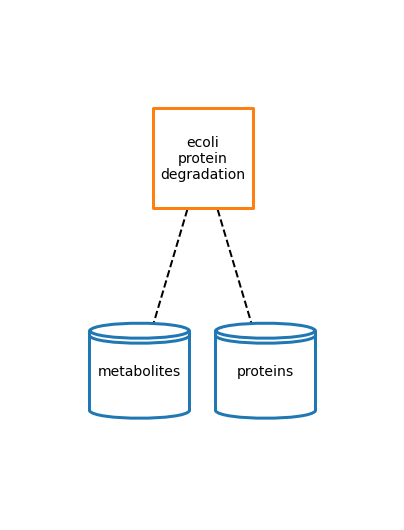

In [50]:
# plot topology
pd_topology_plot_settings = {
    'buffer': 1,
    'node_labels': {
        'ecoli-protein-degradation': 'ecoli\nprotein\ndegradation'
    },
    'node_distance': 5,
    'show_ports': False,
    'node_size': 10000,
    'dashed_edges': True,
    'coordinates': {'ecoli-protein-degradation': (1.5, 0.5)}
}

pd_topology_fig = plot_topology(protein_degradation, pd_topology_plot_settings)

In [51]:
# display ports schema
pp(protein_degradation.ports_schema())

{ 'metabolites': { 'ARG[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'ASN[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'CYS[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'GLN[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'GLT[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
             

                'ANSP-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'ANTHRANSYNCOMPI-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                'ANTHRANSYNCOMPII-MONOMER[c]': { '_default': 0,
                                                 '_divider': 'binomial',
                                                 '_emit': True,
                                                 '_properties': {'bulk': True}},
                'APHA-MONOMER[p]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_pr

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'B1828-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'B2075-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'B2076-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'B2077-MONOMER[i]': { '_default': 0,
                                      '_divider'

                'CYSP-MONOMER[p]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'CYSS-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'CYST-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'CYSTATHIONINE-BETA-LYASE-MONOMER[c]': { '_default': 0,
                                                         '_divider': 'binomial',
                                                         '_emit': True,
                                                         '_properties': {

                'EG10043-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10044-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10047-MONOMER[p]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10048-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                        '_properties': {'bulk': True}},
                'EG10443-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10454-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10455-MONOMER[p]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10456-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                                        '_properties': {'bulk': True}},
                'EG10723-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10724-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10725-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10735-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                                        '_properties': {'bulk': True}},
                'EG10851-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10852-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10853-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10854-MONOMER[o]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10904-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10905-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10906-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG10907-MONOMER[c]': { '_default': 0,
                

                'EG11007-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11008-MONOMER[p]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11009-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11010-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11100-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11101-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11103-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11105-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                

                'EG11160-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11161-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11162-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11164-MONOMER[o]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11285-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11287-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11288-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11289-MONOMER[c]': { '_default': 0,
                

                                        '_properties': {'bulk': True}},
                'EG11388-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11389-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11390-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11391-MONOMER[p]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                'EG11565-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11568-MONOMER[m]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11569-MONOMER[o]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11570-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                'EG11749-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11750-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11757-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11758-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                        '_properties': {'bulk': True}},
                'EG11850-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11851-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11852-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11853-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                

                'EG11995-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11998-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG11999-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12002-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                'EG12214-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12216-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12217-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12220-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                'EG12319-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12323-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12325-MONOMER[l]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12326-MONOMER[l]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                'EG12455-MONOMER[i]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12600-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12605-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'EG12609-MONOMER[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                

                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                'FUM-MEMB2[i]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                'FUMA-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'FUMB-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'FUMC-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                        

                'G6127-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6128-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6129-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6131-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6133-MONOMER[c]': { '_default'

                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6190-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6191-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6192-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6193-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': T

                'G6275-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6276-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6277-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6278-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6281-MONOMER[c]': { '_default'

                                      '_properties': {'bulk': True}},
                'G6339-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6340-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6345-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6346-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                                      '_properties': {'bulk': True}},
                'G6478-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6480-MONOMER[l]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6481-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6482-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                'G6621-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6622-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6623-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6624-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6625-MONOMER[c]': { '_default'

                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6792-MONOMER[l]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6793-MONOMER[l]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6794-MONOMER[l]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6795-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': T

                'G6906-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6907-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6908-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6909-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G6911-MONOMER[c]': { '_default'

                'G7020-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7021-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7022-MONOMER[p]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7023-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7024-MONOMER[c]': { '_default'

                'G7112-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7117-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7118-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7119-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7122-MONOMER[c]': { '_default'

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7172-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7173-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7174-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7175-MONOMER[c]': { '_default': 0,
                                      '_divider'

                'G7217-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7218-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7219-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7220-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7221-MONOMER[m]': { '_default'

                'G7288-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7289-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7290-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7291-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7292-MONOMER[c]': { '_default'

                                      '_properties': {'bulk': True}},
                'G7424-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7425-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7426-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7427-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7564-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7566-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7567-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7568-MONOMER[c]': { '_default': 0,
                                      '_divider'

                'G7684-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7685-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7686-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7687-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7688-MONOMER[c]': { '_default'

                                      '_properties': {'bulk': True}},
                'G7864-MONOMER[e]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7865-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7866-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'G7867-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                'GALACTOKIN-MONOMER[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                'GALACTONATE-DEHYDRATASE-MONOMER[c]': { '_default': 0,
                                                        '_divider': 'binomial',
                                                        '_emit': True,
                                                        '_properties': { 'bulk': True}},
                'GALACTURIDYLYLTRANS-MONOMER[c]': { '_default': 0,
                                                    '_divider': 'binomial',
                                                    '_emit': True,
                                                    '_properties': { 'bulk': True}},
                'GALP-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                       

                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                'GLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]': { '_default': 0,
                                                          '_divider': 'binomial',
                                                          '_emit': True,
                                                          '_properties': { 'bulk': True}},
                'GLYCEROL-KIN-MONOMER[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                'GLYCOGEN-BRANCH-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                          

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'HYAC-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'HYBA-MONOMER[p]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'HYBC-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'HYCBSMALL-MONOMER[c]': { '_default': 0,
                                          '_divider': 'bino

                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                'METHYLENETHFREDUCT-MONOMER[c]': { '_default': 0,
                                                   '_divider': 'binomial',
                                                   '_emit': True,
                                                   '_properties': { 'bulk': True}},
                'METHYLMALONYL-COA-MUT-MONOMER[c]': { '_default': 0,
                                                      '_divider': 'binomial',
                                                      '_emit': True,
                                                      '_properties': { 'bulk': True}},
                'METI-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_pr

                                      '_properties': {'bulk': True}},
                'MONOMER0-2665[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2668[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2670[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2671[o]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properti

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2879[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2880[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2881[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                'MONOMER0-2882[m]': { '_default': 0,
                                      '_divider'

                                    '_properties': {'bulk': True}},
                'MONOMER0-921[m]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'MOTA-FLAGELLAR-MOTOR-STATOR-PROTEIN[m]': { '_default': 0,
                                                            '_divider': 'binomial',
                                                            '_emit': True,
                                                            '_properties': { 'bulk': True}},
                'MOTB-FLAGELLAR-MOTOR-STATOR-PROTEIN[m]': { '_default': 0,
                                                            '_divider': 'binomial',
                                                            '_emit': True,
                                                            '_properties': { 'bulk': True}},
                'MTLA-MONOMER[i]': { '_defau

                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                'OROTPDECARB-MONOMER[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True,
                                            '_properties': {'bulk': True}},
                'PABASYN-COMPI-MONOMER[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                'PABASYN-COMPII-MONOMER[c]': { '_default': 0,
                                               '_divider': 'binomial',
                                               '_emit': True,
                                               '_properties': {'bulk': True}},
                'PALMITOTRANS-MONOMER[m]': { '_default': 

                'PGLUCONDEHYDRAT-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                'PGLYCDEHYDROG-MONOMER[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                'PGLYCEROLTRANSI-MONOMER[i]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                'PGMI-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
         

                'RFFTRANS-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                'RHAMNISOM-MONOMER[c]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                'RHAMNULOKIN-MONOMER[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True,
                                            '_properties': {'bulk': True}},
                'RHAMNULPALDOL-MONOMER[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                          

                                           '_properties': {'bulk': True}},
                'TSR-MONOMER[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                'TTDA-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'TTDB-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'TYRB-MONOMER[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': T

                'YDEY-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YDEZ-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YDHC-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YDHE-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YDJE-MONOMER[i]': { '_default': 0,
            

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'YTFT-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'ZNUA-MONOMER[p]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'ZNUB-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                'ZNUC-MONOMER[i]': { '_default': 0,
                                     '_divider': 'binomial',
   

In [52]:
# run simulation and retrieve final data
pd_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': pd_topology}

pd_data = simulate_process(protein_degradation, pd_settings)

print('\nsimulation output:')
pp(pd_data['bulk'])


Simulation ID: 45bd3da8-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:31:44
Completed in 0.441322 seconds

simulation output:
{ '1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]': [129, 129, 129, 129, 129, 129],
  '1-PFK-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  '2-DEHYDROPANTOATE-REDUCT-MONOMER[c]': [245, 245, 245, 245, 245, 245],
  '2-ISOPROPYLMALATESYN-MONOMER[c]': [1604, 1604, 1604, 1604, 1604, 1604],
  '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]': [702, 702, 702, 702, 702, 702],
  '2-OCTAPRENYLPHENOL-HYDROX-MONOMER[i]': [42, 42, 42, 42, 42, 42],
  '3-CH3-2-OXOBUTANOATE-OH-CH3-XFER-MONOMER[c]': [5, 5, 5, 5, 5, 5],
  '3-ISOPROPYLMALDEHYDROG-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  '3-OXOACYL-ACP-REDUCT-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  '3-OXOACYL-ACP-SYNTHII-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  '4OHBENZOATE-OCTAPRENYLTRANSFER-MONOMER[i]': [94, 94, 94, 94, 94, 94],
  '6PFK-1-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  '6PFK-2-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  '6PGLUCONDEHYDROG-MONOMER[c]': [1, 1, 1, 1

  'EG10665-MONOMER[c]': [1067, 1067, 1067, 1067, 1067, 1067],
  'EG10666-MONOMER[c]': [420, 420, 420, 420, 420, 420],
  'EG10667-MONOMER[c]': [1385, 1385, 1385, 1385, 1385, 1385],
  'EG10668-MONOMER[c]': [84, 84, 84, 84, 84, 84],
  'EG10669-MONOMER[p]': [81017, 81014, 81011, 81005, 81001, 80996],
  'EG10670-MONOMER[o]': [9, 9, 9, 9, 9, 9],
  'EG10671-MONOMER[o]': [38, 38, 38, 38, 38, 38],
  'EG10673-MONOMER[o]': [37927, 37927, 37927, 37926, 37923, 37921],
  'EG10679-MONOMER[o]': [109, 109, 109, 108, 108, 108],
  'EG10680-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'EG10684-MONOMER[o]': [17343, 17342, 17340, 17338, 17336, 17336],
  'EG10686-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'EG10687-MONOMER[c]': [104, 104, 104, 104, 104, 104],
  'EG10689-MONOMER[c]': [161, 161, 161, 161, 161, 161],
  'EG10690-MONOMER[c]': [399, 399, 399, 399, 399, 399],
  'EG10694-MONOMER[c]': [3, 3, 3, 3, 3, 3],
  'EG10695-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'EG10696-MONOMER[i]': [656, 656, 656, 656, 655, 655],
  'EG10697-MONOM

  'EG11118-MONOMER[c]': [365, 365, 365, 365, 365, 365],
  'EG11119-MONOMER[c]': [966, 966, 966, 966, 966, 966],
  'EG11120-MONOMER[c]': [9, 9, 9, 9, 9, 9],
  'EG11121-MONOMER[c]': [379, 379, 379, 379, 379, 379],
  'EG11122-MONOMER[i]': [242, 242, 242, 242, 242, 242],
  'EG11123-MONOMER[i]': [303, 303, 303, 303, 303, 303],
  'EG11124-MONOMER[o]': [5, 5, 5, 5, 5, 5],
  'EG11125-MONOMER[c]': [40, 40, 40, 40, 40, 40],
  'EG11126-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'EG11127-MONOMER[c]': [79, 79, 79, 79, 79, 79],
  'EG11128-MONOMER[c]': [379, 379, 379, 379, 379, 379],
  'EG11129-MONOMER[c]': [43, 43, 43, 43, 43, 43],
  'EG11130-MONOMER[m]': [10, 10, 10, 10, 10, 10],
  'EG11131-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'EG11132-MONOMER[c]': [3, 3, 3, 3, 3, 3],
  'EG11133-MONOMER[i]': [236, 236, 236, 236, 236, 236],
  'EG11134-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'EG11136-MONOMER[c]': [7, 7, 7, 7, 7, 7],
  'EG11137-MONOMER[c]': [2431, 2431, 2431, 2431, 2431, 2431],
  'EG11139-MONOMER[c]': [286, 286, 286

  'EG11905-MONOMER[c]': [12, 12, 12, 12, 12, 12],
  'EG11906-MONOMER[c]': [3, 3, 3, 3, 3, 3],
  'EG11910-MONOMER[c]': [14, 14, 14, 14, 14, 14],
  'EG11911-MONOMER[c]': [8, 8, 8, 8, 8, 8],
  'EG11912-MONOMER[i]': [15, 15, 15, 15, 15, 15],
  'EG11913-MONOMER[c]': [50, 50, 50, 50, 50, 50],
  'EG11914-MONOMER[i]': [382, 382, 382, 382, 382, 382],
  'EG11915-MONOMER[c]': [55, 55, 55, 55, 55, 55],
  'EG11916-MONOMER[c]': [583, 583, 583, 583, 583, 583],
  'EG11917-MONOMER[c]': [12, 12, 12, 12, 12, 12],
  'EG11918-MONOMER[p]': [5, 5, 5, 5, 5, 5],
  'EG11919-MONOMER[i]': [48, 48, 48, 48, 48, 48],
  'EG11920-MONOMER[c]': [25, 25, 25, 25, 25, 25],
  'EG11921-MONOMER[c]': [292, 292, 292, 292, 292, 292],
  'EG11922-MONOMER[c]': [203, 203, 203, 203, 203, 203],
  'EG11923-MONOMER[e]': [49, 49, 49, 49, 49, 49],
  'EG11924-MONOMER[i]': [4, 4, 4, 4, 4, 4],
  'EG11925-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'EG11926-MONOMER[i]': [47, 47, 47, 47, 47, 47],
  'EG11928-MONOMER[c]': [81, 81, 81, 81, 81, 81],
  'EG1

  'G6101-MONOMER[i]': [7, 7, 7, 7, 7, 7],
  'G6103-MONOMER[c]': [48, 48, 48, 48, 48, 48],
  'G6104-MONOMER[p]': [1, 1, 1, 1, 1, 1],
  'G6106-MONOMER[c]': [2, 2, 2, 2, 2, 2],
  'G6107-MONOMER[c]': [181, 181, 181, 181, 181, 181],
  'G6108-MONOMER[c]': [855, 855, 855, 854, 854, 854],
  'G6109-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'G6110-MONOMER[c]': [270, 270, 270, 270, 270, 270],
  'G6111-MONOMER[i]': [6, 6, 6, 6, 6, 6],
  'G6112-MONOMER[c]': [42, 42, 42, 42, 42, 42],
  'G6115-MONOMER[c]': [14, 14, 14, 14, 14, 14],
  'G6116-MONOMER[c]': [39, 39, 39, 39, 39, 39],
  'G6117-MONOMER[c]': [41, 41, 41, 41, 41, 41],
  'G6118-MONOMER[c]': [64, 64, 64, 64, 64, 64],
  'G6120-MONOMER[c]': [27, 27, 27, 27, 27, 27],
  'G6121-MONOMER[c]': [82, 82, 82, 82, 82, 82],
  'G6122-MONOMER[c]': [12, 12, 12, 12, 12, 12],
  'G6123-MONOMER[c]': [159, 159, 159, 159, 159, 159],
  'G6124-MONOMER[c]': [35, 35, 35, 35, 35, 35],
  'G6125-MONOMER[c]': [531, 531, 531, 531, 531, 531],
  'G6126-MONOMER[i]': [24, 24, 24, 24, 2

  'G6716-MONOMER[c]': [4, 4, 4, 4, 4, 4],
  'G6717-MONOMER[c]': [3, 3, 3, 3, 3, 3],
  'G6718-MONOMER[c]': [100, 100, 100, 100, 100, 100],
  'G6719-MONOMER[c]': [25, 25, 25, 25, 25, 25],
  'G6720-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G6721-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'G6725-MONOMER[c]': [107, 107, 107, 107, 107, 107],
  'G6727-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'G6728-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'G6729-MONOMER[c]': [5, 5, 5, 5, 5, 5],
  'G6730-MONOMER[i]': [11, 11, 11, 11, 11, 11],
  'G6731-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G6732-MONOMER[c]': [127, 127, 127, 127, 127, 127],
  'G6736-MONOMER[c]': [187, 187, 187, 187, 187, 187],
  'G6737-MONOMER[c]': [677, 677, 677, 677, 677, 677],
  'G6738-MONOMER[c]': [18, 18, 18, 18, 18, 18],
  'G6741-MONOMER[c]': [41, 41, 41, 41, 41, 41],
  'G6742-MONOMER[i]': [625, 625, 625, 625, 625, 625],
  'G6743-MONOMER[c]': [27, 27, 27, 27, 27, 27],
  'G6745-MONOMER[c]': [47, 47, 47, 47, 47, 47],
  'G6746-MONOMER[c]': [141, 141, 141, 141, 141, 141]

  'G7297-MONOMER[i]': [14, 14, 14, 14, 14, 14],
  'G7298-MONOMER[m]': [187, 187, 187, 187, 187, 187],
  'G7307-MONOMER[i]': [13, 13, 13, 13, 13, 13],
  'G7308-MONOMER[c]': [8, 8, 8, 8, 8, 8],
  'G7310-MONOMER[i]': [29, 29, 29, 29, 29, 29],
  'G7311-MONOMER[m]': [74, 74, 74, 74, 74, 74],
  'G7312-MONOMER[c]': [5910, 5910, 5910, 5910, 5910, 5910],
  'G7313-MONOMER[c]': [56, 56, 56, 56, 56, 56],
  'G7314-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'G7315-MONOMER[m]': [2062, 2062, 2062, 2062, 2062, 2062],
  'G7316-MONOMER[o]': [5, 5, 5, 5, 5, 5],
  'G7317-MONOMER[c]': [16, 16, 16, 16, 16, 16],
  'G7318-MONOMER[c]': [250, 250, 250, 250, 250, 250],
  'G7319-MONOMER[c]': [537, 537, 537, 537, 537, 537],
  'G7320-MONOMER[o]': [0, 0, 0, 0, 0, 0],
  'G7321-MONOMER[i]': [481, 481, 481, 481, 481, 481],
  'G7322-MONOMER[i]': [2, 2, 2, 2, 2, 2],
  'G7323-MONOMER[i]': [21, 21, 21, 21, 21, 21],
  'G7324-MONOMER[c]': [4000, 4000, 4000, 4000, 4000, 4000],
  'G7325-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G7326-MONOMER

  'G7909-MONOMER[c]': [151, 151, 151, 151, 151, 151],
  'G7910-MONOMER[c]': [56, 56, 56, 56, 56, 56],
  'G7911-MONOMER[p]': [28, 28, 28, 28, 28, 28],
  'G7912-MONOMER[c]': [0, 0, 0, 0, 0, 0],
  'G7913-MONOMER[c]': [31, 31, 31, 31, 31, 31],
  'G7914-MONOMER[c]': [23, 23, 23, 23, 23, 23],
  'G7915-MONOMER[c]': [29, 29, 29, 29, 29, 29],
  'G7916-MONOMER[m]': [11, 11, 11, 11, 11, 11],
  'G7917-MONOMER[c]': [15, 15, 15, 15, 15, 15],
  'G7919-MONOMER[p]': [14, 14, 14, 14, 14, 14],
  'G7920-MONOMER[p]': [0, 0, 0, 0, 0, 0],
  'G7921-MONOMER[o]': [5, 5, 5, 5, 5, 5],
  'G7922-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G7923-MONOMER[c]': [14, 14, 14, 14, 14, 14],
  'G7924-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'G7925-MONOMER[c]': [5, 5, 5, 5, 5, 5],
  'G7926-MONOMER[i]': [0, 0, 0, 0, 0, 0],
  'G7927-MONOMER[i]': [13, 13, 13, 13, 13, 13],
  'G7928-MONOMER[c]': [40, 40, 40, 40, 40, 40],
  'G7929-MONOMER[i]': [27, 27, 27, 27, 27, 27],
  'G7930-MONOMER[i]': [27, 27, 27, 27, 27, 27],
  'G7931-MONOMER[c]': [11, 1

  'MONOMER0-4228[c]': [72, 72, 72, 72, 72, 72],
  'MONOMER0-4229[c]': [69, 69, 69, 69, 69, 69],
  'MONOMER0-422[i]': [0, 0, 0, 0, 0, 0],
  'MONOMER0-4230[c]': [55, 55, 55, 55, 55, 55],
  'MONOMER0-4231[c]': [24, 24, 24, 24, 24, 24],
  'MONOMER0-4232[c]': [210, 210, 210, 210, 210, 210],
  'MONOMER0-4233[c]': [61, 61, 61, 61, 61, 61],
  'MONOMER0-4234[c]': [709, 709, 709, 709, 708, 708],
  'MONOMER0-4235[c]': [578, 578, 578, 578, 577, 577],
  'MONOMER0-4236[c]': [784, 784, 784, 784, 784, 784],
  'MONOMER0-4237[c]': [894, 894, 894, 894, 894, 894],
  'MONOMER0-4238[c]': [924, 924, 924, 924, 924, 924],
  'MONOMER0-4239[c]': [694, 694, 694, 694, 694, 694],
  'MONOMER0-4240[c]': [580, 580, 580, 580, 580, 580],
  'MONOMER0-4241[c]': [554, 554, 554, 554, 554, 554],
  'MONOMER0-4242[c]': [54, 54, 54, 54, 54, 54],
  'MONOMER0-4243[c]': [78, 78, 78, 78, 78, 78],
  'MONOMER0-4244[c]': [78, 78, 78, 78, 78, 78],
  'MONOMER0-4245[c]': [97, 97, 97, 97, 97, 97],
  'MONOMER0-4246[c]': [22, 22, 22, 22, 22

  'UMPKI-MONOMER[c]': [3, 3, 3, 3, 3, 3],
  'UPPSYN-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'URAA-MONOMER[i]': [1, 1, 1, 1, 1, 1],
  'URACIL-PRIBOSYLTRANS-MONOMER[c]': [4, 4, 4, 4, 4, 4],
  'UROGENDECARBOX-MONOMER[c]': [515, 515, 515, 515, 515, 515],
  'UROGENIIISYN-MONOMER[c]': [21, 21, 21, 21, 21, 21],
  'URPHOS-MONOMER[c]': [1, 1, 1, 1, 1, 1],
  'USHA-MONOMER[p]': [213, 213, 213, 213, 213, 213],
  'UUP-MONOMER[i]': [162, 162, 162, 162, 162, 162],
  'UXAC-MONOMER[c]': [133, 133, 133, 133, 133, 133],
  'VALINE-PYRUVATE-AMINOTRANSFER-MONOMER[c]': [ 1232,
                                                1232,
                                                1232,
                                                1232,
                                                1232,
                                                1232],
  'VALS-MONOMER[c]': [1630, 1630, 1630, 1630, 1630, 1630],
  'VAL[c]': [2111560, 2113202, 2114520, 2115982, 2117610, 2119183],
  'WATER[c]': [ 34912886892,
                3

In [53]:
# # plot output
# pd_fig = plot_variables(
#     pd_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>RNA Degradation<u/>

In [54]:
from ecoli.processes.rna_degradation import RnaDegradation

# print documentation from process docstring
print(ecoli.processes.rna_degradation.__doc__)


RNA Degradation

Submodel for RNA degradation.

Mathematical formulation:

dr/dt = Kb - Kd * r
or,

dr/dt = Kb - kcatEndoRNase * EndoRNase * r / (Km + r)
or,

dr/dt = Kb - kcatEndoRNase * EndoRNase * r/Km / (1 + Sum(r/Km))

    where   r = RNA counts
            Kb = RNA production given a RNAP synthesis rate 
            tau = doubling time
            kcatEndoRNase = enzymatic activity for EndoRNases
            kd = RNA degradation rates 
            Km = Michaelis-Menten constants fitted to recapitulate first-order
            RNA decay:
                kd * r = kcatEndoRNase * EndoRNase * r / (Km + r),
                    non-cooperative EndoRNases
                kd * r = kcatEndoRNase * EndoRNase * r/Km / (1 + sum(r/Km)),
                    cooperation

This sub-model encodes molecular simulation of RNA degradation as two main
steps guided by RNases, "endonucleolytic cleavage" and "exonucleolytic
digestion":

1. Compute total counts of RNA to be degraded (D) and total capacity

In [55]:
# load in parameters
rd_params = load_sim_data.get_rna_degradation_config()

# initialize process and topology
rna_degradation = RnaDegradation(rd_params)

rd_topology = {
    'charged_trna': ('bulk',),
    'bulk_RNAs': ('bulk',),
    'nmps': ('bulk',),
    'fragmentMetabolites': ('bulk',),
    'fragmentBases': ('bulk',),
    'endoRnases': ('bulk',),
    'exoRnases': ('bulk',),
    'subunits': ('bulk',),
    'molecules': ('bulk',),
    'RNAs': ('unique', 'RNA'),
    'active_ribosome': ('unique', 'active_ribosome'),
    'listeners': ('listeners',)
}

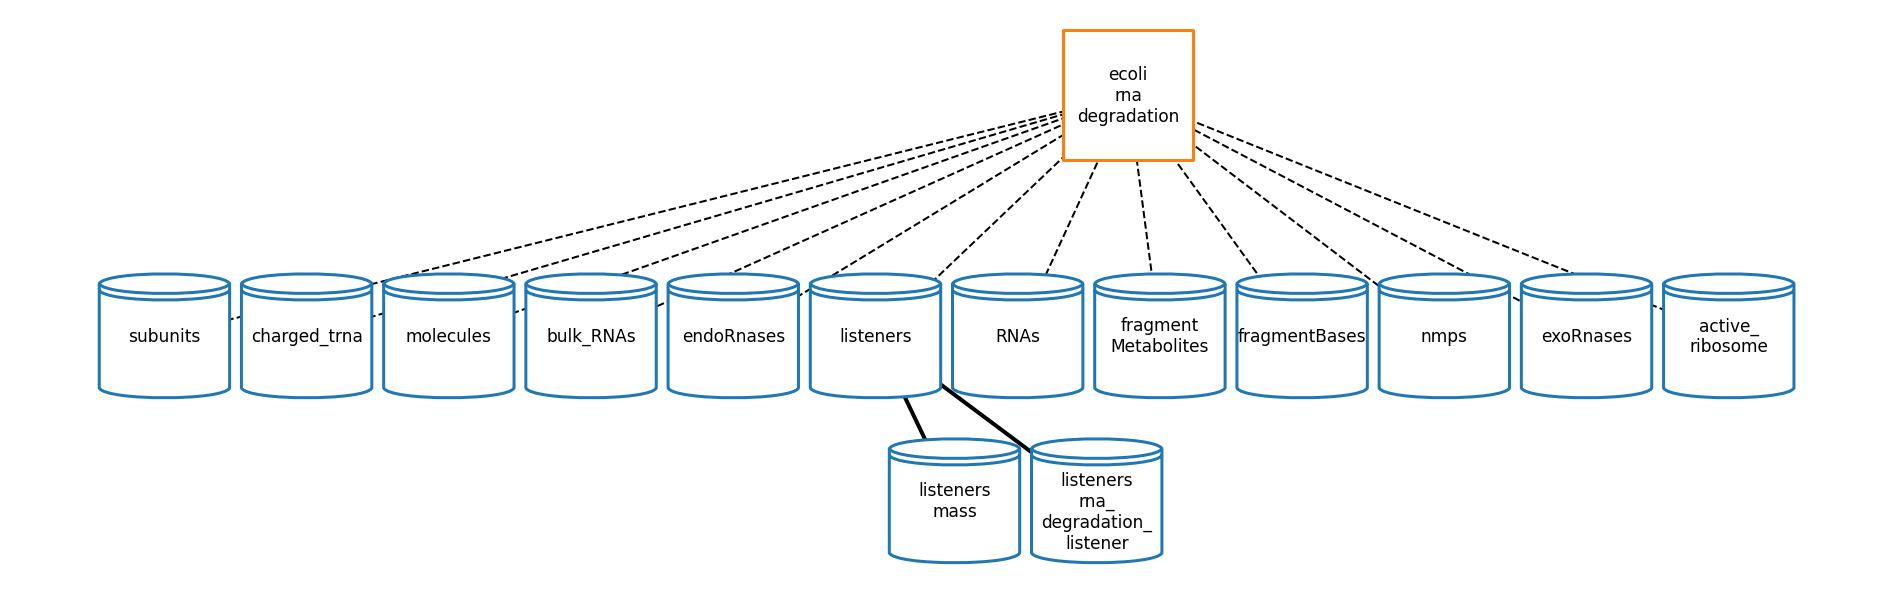

In [56]:
# plot topology
rd_topology_plot_settings = {
    'node_labels': {
        'ecoli-rna-degradation': 'ecoli\nrna\ndegradation',
        'fragmentMetabolites': 'fragment\nMetabolites',
        'listeners\nrna_degradation_listener': '\nlisteners\nrna_\ndegradation_\nlistener',
        'active_ribosome': 'active_\nribosome'
    },
    'show_ports': False,
    'node_size': 17000,
    'node_distance': 3.3,
    'dashed_edges': True,
    'font_size': 17,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-rna-degradation': (7, 1.75)}
}

rd_topology_fig = plot_topology(rna_degradation, rd_topology_plot_settings)

In [57]:
# display ports schema
pp(rna_degradation.ports_schema())

{ 'RNAs': { '*': { 'TU_index': {'_default': 0, '_updater': 'set'},
                   'can_translate': {'_default': 0, '_updater': 'set'},
                   'is_full_transcript': {'_default': 0, '_updater': 'set'},
                   'unique_index': {'_default': 0, '_updater': 'set'}}},
  'active_ribosome': {'*': {'unique_index': {'_default': 0}}},
  'bulk_RNAs': { '6S-RNA[c]': { '_default': 0,
                                '_divider': 'binomial',
                                '_emit': True,
                                '_properties': {'bulk': True},
                                '_updater': 'nonnegative_accumulate'},
                 'C0730-RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'CSRB-RNA[c]': { '_default': 0,
                

                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10097_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10098_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10099_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
     

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10178_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10179_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10180_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10259_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10260_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10261_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                 'EG10351_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10352_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10353_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10355_RNA[c]': { '_default': 0,
                     

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10460_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10461_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10462_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10568_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10569_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10570_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10662_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10663_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10664_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
            

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10744_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10745_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10746_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
            

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10841_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10842_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10843_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10927_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10928_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10929_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
     

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10991_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10992_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG10993_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
            

                 'EG11065_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11066_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11067_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11068_RNA[c]': { '_default': 0,
                     

                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11156_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11157_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11158_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
     

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11253_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11254_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11255_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                 'EG11335_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11336_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11337_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11338_RNA[c]': { '_default': 0,
                     

                 'EG11421_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11422_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11423_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11424_RNA[c]': { '_default': 0,
                     

                                     '_updater': 'nonnegative_accumulate'},
                 'EG11506_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11507_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11508_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'

                 'EG11583_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11585_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11586_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11587_RNA[c]': { '_default': 0,
                     

                                     '_updater': 'nonnegative_accumulate'},
                 'EG11658_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11659_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11660_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11739_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11740_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11741_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                 'EG11816_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11817_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11819_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11820_RNA[c]': { '_default': 0,
                     

                 'EG11926_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11927_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11928_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11929_RNA[c]': { '_default': 0,
                     

                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11961_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11962_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG11963_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                     

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12082_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12083_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12084_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
            

                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12166_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12167_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12168_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
     

                 'EG12248_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12249_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12251_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12252_RNA[c]': { '_default': 0,
                     

                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12336_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12337_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12338_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
     

                 'EG12424_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12427_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12428_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12429_RNA[c]': { '_default': 0,
                     

                 'EG12693_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12694_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12697_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12702_RNA[c]': { '_default': 0,
                     

                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12903_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12908_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'EG12933_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
            

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-10470_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-10471_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-10472_RNA[c]': { '_default': 0,
                                      '_divider': 'binomia

                 'G0-10700_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-10702_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-10703_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-10704_RNA[c]': { '_default': 0,
     

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-16742_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-16743_RNA[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True},
                                      '_updater': 'nonnegative_accumulate'},
                 'G0-16744_RNA[c]': { '_default': 0,
                                      '_divider': 'binomia

                 'G0-9541_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'G0-9561_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'G0-9562_RNA[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True},
                                     '_updater': 'nonnegative_accumulate'},
                 'G0-9563_RNA[c]': { '_default': 0,
                     

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6106_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6107_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6108_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': 

                 'G6166_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6167_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6168_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6169_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6251_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6252_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6253_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'b

                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6343_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6344_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6345_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'b

                 'G6439_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6440_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6441_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6442_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6477_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6478_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6479_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'b

                 'G6535_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6536_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6539_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6540_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                 'G6604_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6605_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6606_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6607_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6682_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6683_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6684_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'b

                 'G6767_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6769_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6770_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6771_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                 'G6850_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6851_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6852_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6853_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6925_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6926_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G6928_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'b

                 'G7005_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7006_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7007_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7008_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7110_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7111_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7112_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_

                 'G7177_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7178_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7179_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7180_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                 'G7256_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7257_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7258_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7259_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                                   '_updater': 'nonnegative_accumulate'},
                 'G7319_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7320_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7321_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7322_RNA[c

                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7370_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7371_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7372_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'b

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7420_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7421_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7422_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': 

                                   '_updater': 'nonnegative_accumulate'},
                 'G7489_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7490_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7491_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7492_RNA[c

                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7579_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7580_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7582_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7638_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7639_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7640_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': 

                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7699_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7701_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7702_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': 

                 'G7798_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7800_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7802_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7804_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                 'G7855_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7856_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7858_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7859_RNA[c]': { '_default': 0,
                                   '_divider': 'binom

                                   '_updater': 'nonnegative_accumulate'},
                 'G7888_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7889_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7890_RNA[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True},
                                   '_updater': 'nonnegative_accumulate'},
                 'G7891_RNA[c

                 'RNA0-241[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True},
                                  '_updater': 'nonnegative_accumulate'},
                 'RNA0-281[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True},
                                  '_updater': 'nonnegative_accumulate'},
                 'RNA0-300[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True},
                                  '_updater': 'nonnegative_accumulate'},
                 'RNA0-301[c]': { '_default': 0,
                                  '_divider': 'binomial',
           

                                  '_emit': True,
                                  '_properties': {'bulk': True},
                                  '_updater': 'nonnegative_accumulate'},
                 'RYED-RNA[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True},
                                  '_updater': 'nonnegative_accumulate'},
                 'RYEE-RNA[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True},
                                  '_updater': 'nonnegative_accumulate'},
                 'RYFA-RNA[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True},
    

                                     '_properties': {'bulk': True}},
                    'RNA0-313[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                    'RNA0-314[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                    'RNA0-319[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                    'RNA0-321[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': Tru

                    'charged-leuX-tRNA[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                    'charged-leuZ-tRNA[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                    'charged-lysT-tRNA[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                    'charged-lysV-tRNA[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True

                                       '_properties': {'bulk': True}}},
  'fragmentBases': { 'polymerized_ATP[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                     'polymerized_CTP[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                     'polymerized_GTP[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                     'polymerized_UTP[c]': { '_default': 0,
                                             '_divider': 'binomial',
 

In [58]:
# run simulation and retrieve final data
rd_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': rd_topology}

rd_data = simulate_process(rna_degradation, rd_settings)

print('\nsimulation output:')
pp(rd_data['bulk'])


Simulation ID: 51609b5a-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:32:04
Completed in 2.05 seconds

simulation output:
{ '6S-RNA[c]': [0, 0, 0, 0, 0, 0],
  'AMP[c]': [143639, 143639, 158193, 177370, 202910, 233446],
  'C0730-RNA[c]': [0, 0, 0, 0, 0, 0],
  'CMP[c]': [468858, 468858, 483653, 502444, 527405, 557213],
  'CPLX0-3953[c]': [2896, 2896, 2896, 2896, 2896, 2896],
  'CPLX0-3962[c]': [3290, 3290, 3290, 3290, 3290, 3290],
  'CSRB-RNA[c]': [0, 0, 0, 0, 0, 0],
  'CSRC-RNA[c]': [0, 0, 0, 0, 0, 0],
  'DICF-RNA[c]': [0, 0, 0, 0, 0, 0],
  'DSRA-RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10001_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10002_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10003_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10004_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10006_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10007_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10008_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10010_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10011_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10012_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10013

  'EG10599_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10600_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10601_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10602_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10603_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10604_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10605_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10606_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10607_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10608_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10609_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10610_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10611_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10612_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10613_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10614_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10615_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10616_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10617_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10618_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10619_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10620_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10621_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10622_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG10623_RNA[c]': [0, 0, 0, 0, 0, 0],


  'EG11096_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11097_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11098_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11099_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11100_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11101_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11102_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11103_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11104_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11105_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11108_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11109_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11110_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11111_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11112_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11113_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11116_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11117_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11118_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11119_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11120_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11121_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11122_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11123_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11124_RNA[c]': [0, 0, 0, 0, 0, 0],


  'EG11504_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11505_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11506_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11507_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11508_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11509_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11510_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11511_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11512_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11514_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11515_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11516_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11517_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11519_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11520_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11521_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11522_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11523_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11524_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11525_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11526_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11527_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11528_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11529_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11530_RNA[c]': [0, 0, 0, 0, 0, 0],


  'EG11727_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11728_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11729_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11730_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11731_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11732_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11733_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11734_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11735_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11736_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11737_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11738_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11739_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11740_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11741_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11742_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11743_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11744_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11746_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11747_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11748_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11749_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11750_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11751_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG11752_RNA[c]': [0, 0, 0, 0, 0, 0],


  'EG12197_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12198_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12200_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12201_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12202_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12203_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12204_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12205_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12207_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12208_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12209_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12210_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12211_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12212_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12213_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12214_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12215_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12216_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12217_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12219_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12220_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12221_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12223_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12224_RNA[c]': [0, 0, 0, 0, 0, 0],
  'EG12225_RNA[c]': [0, 0, 0, 0, 0, 0],


  'G0-8891_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8892_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8893_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8894_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8896_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8898_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8900_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8902_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8903_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8904_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8906_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8907_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8908_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8911_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-8912_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9041_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9081_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9121_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9384_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9387_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9461_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9541_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9561_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9562_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G0-9563_RNA[c]': [0, 0, 0, 0, 0, 0],


  'G6659_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6660_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6661_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6662_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6663_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6664_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6665_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6666_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6667_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6668_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6669_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6670_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6671_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6672_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6673_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6674_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6675_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6676_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6677_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6678_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6679_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6680_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6681_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6682_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6683_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6684_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G6685_RNA

  'G7217_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7218_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7219_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7220_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7221_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7222_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7223_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7224_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7225_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7226_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7227_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7228_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7229_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7230_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7231_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7232_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7233_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7234_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7235_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7236_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7237_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7238_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7239_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7240_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7241_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7242_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7243_RNA

  'G7762_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7763_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7767_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7769_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7776_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7777_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7789_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7798_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7800_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7802_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7804_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7806_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7808_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7814_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7816_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7818_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7821_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7823_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7825_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7826_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7827_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7828_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7829_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7830_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7832_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7833_RNA[c]': [0, 0, 0, 0, 0, 0],
  'G7834_RNA

  'charged-asnT-tRNA[c]': [1720, 1720, 1720, 1720, 1720, 1720],
  'charged-asnU-tRNA[c]': [1223, 1223, 1223, 1223, 1223, 1223],
  'charged-asnV-tRNA[c]': [2099, 2099, 2099, 2099, 2099, 2099],
  'charged-aspT-tRNA[c]': [1017, 1017, 1017, 1017, 1017, 1017],
  'charged-aspU-tRNA[c]': [1800, 1800, 1800, 1800, 1800, 1800],
  'charged-aspV-tRNA[c]': [3530, 3530, 3530, 3530, 3530, 3530],
  'charged-cysT-tRNA[c]': [2978, 2978, 2978, 2978, 2978, 2978],
  'charged-glnU-tRNA[c]': [1777, 1777, 1777, 1777, 1777, 1777],
  'charged-glnV-tRNA[c]': [2254, 2254, 2254, 2254, 2254, 2254],
  'charged-glnW-tRNA[c]': [3874, 3874, 3874, 3874, 3874, 3874],
  'charged-glnX-tRNA[c]': [1422, 1422, 1422, 1422, 1422, 1422],
  'charged-gltT-tRNA[c]': [2418, 2418, 2418, 2418, 2418, 2418],
  'charged-gltU-tRNA[c]': [4000, 4000, 4000, 4000, 4000, 4000],
  'charged-gltV-tRNA[c]': [2499, 2499, 2499, 2499, 2499, 2499],
  'charged-gltW-tRNA[c]': [3937, 3937, 3937, 3937, 3937, 3937],
  'charged-glyT-tRNA[c]': [1545, 1545, 1

In [59]:
# # plot output
# rd_fig = plot_variables(
#     rd_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>Two Component System<u/>

In [60]:
from ecoli.processes.two_component_system import TwoComponentSystem

# print documentation from process docstring
print(ecoli.processes.two_component_system.__doc__)


Two Component System

Two component system sub-model.



In [61]:
# load in parameters
tcs_params = load_sim_data.get_two_component_system_config()
    
# initialize process and topology
two_component_system = TwoComponentSystem(tcs_params)

tcs_topology = {
    'listeners': ('listeners',),
    'molecules': ('bulk',)
}

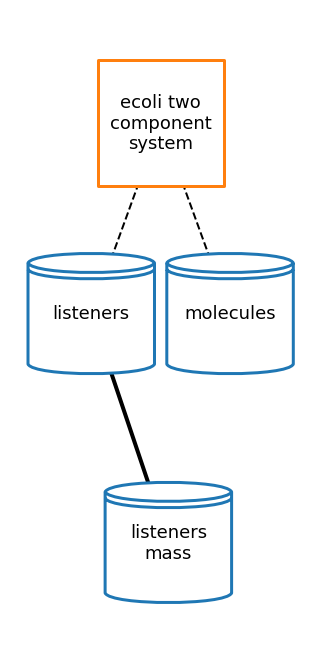

In [62]:
# plot topology
tcs_topology_plot_settings = {
    'node_labels': {
        'ecoli-two-component-system': 'ecoli two\ncomponent\nsystem'
    },
    'show_ports': False,
    'node_size': 16000,
    'node_distance': 5.0,
    'dashed_edges': True,
    'font_size': 18,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-two-component-system': (1.35, 1)}
}

tcs_topology_fig = plot_topology(two_component_system, tcs_topology_plot_settings)

In [63]:
# display ports schema
pp(two_component_system.ports_schema())

{ 'listeners': {'mass': {'cell_mass': {'_default': 0}}},
  'molecules': { 'ADP[c]': { '_default': 0,
                             '_divider': 'binomial',
                             '_emit': True,
                             '_properties': {'bulk': True}},
                 'ARCA-MONOMER[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'ARCB-CPLX[i]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'ATP[c]': { '_default': 0,
                             '_divider': 'binomial',
                             '_emit': True,
                             '_properties': {'bulk': True}},
                 'BAER-MONOMER[c]': { '_default': 0,
                      

In [64]:
# run simulation and retrieve final data
tcs_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': tcs_topology}

tcs_data = simulate_process(two_component_system, tcs_settings)

print('\nsimulation output:')
pp(tcs_data['bulk'])


Simulation ID: 5674cd0a-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:32:11
Completed in 0.313263 seconds

simulation output:
{ 'ADP[c]': [404873, 404873, 404873, 404873, 404873, 404873],
  'ARCA-MONOMER[c]': [2769, 2769, 2769, 2769, 2769, 2769],
  'ARCB-CPLX[i]': [0, 0, 0, 0, 0, 0],
  'ATP[c]': [7866030, 7866030, 7866030, 7866030, 7866030, 7866030],
  'BAER-MONOMER[c]': [200, 200, 200, 200, 200, 200],
  'BAES-INDOLE-CPLX[i]': [0, 0, 0, 0, 0, 0],
  'BAES-MONOMER[i]': [19, 19, 19, 19, 19, 19],
  'BASR-MONOMER[c]': [180, 180, 180, 180, 180, 180],
  'BASS-FE+3-CPLX[i]': [0, 0, 0, 0, 0, 0],
  'BASS-MONOMER[i]': [46, 46, 46, 46, 46, 46],
  'CPLX0-8168[i]': [13, 13, 13, 13, 13, 13],
  'DCUR-MONOMER[c]': [80, 80, 80, 80, 80, 80],
  'DCUS-MONOMER[p]': [12, 12, 12, 12, 12, 12],
  'DCUS-SUC-CPLX[p]': [0, 0, 0, 0, 0, 0],
  'NARL-MONOMER[c]': [679, 679, 679, 679, 679, 679],
  'NARX-CPLX[i]': [17, 17, 17, 17, 17, 17],
  'NARX-NITRATE-CPLX[i]': [0, 0, 0, 0, 0, 0],
  'PHOB-MONOMER[c]': [88, 

In [65]:
# # plot output
# tcs_fig = plot_variables(
#     tcs_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>Equilibrium<u/>

In [66]:
from ecoli.processes.equilibrium import Equilibrium

# Print documentation from process docstring
print(ecoli.processes.equilibrium.__doc__)


Equilibrium

Equilibrium binding sub-model.



In [67]:
# load in parameters
eq_params = load_sim_data.get_equilibrium_config()

# initialize process and topology
equilibrium = Equilibrium(eq_params)

eq_topology = {
    'listeners': ('listeners',),
    'molecules': ('bulk',)
}

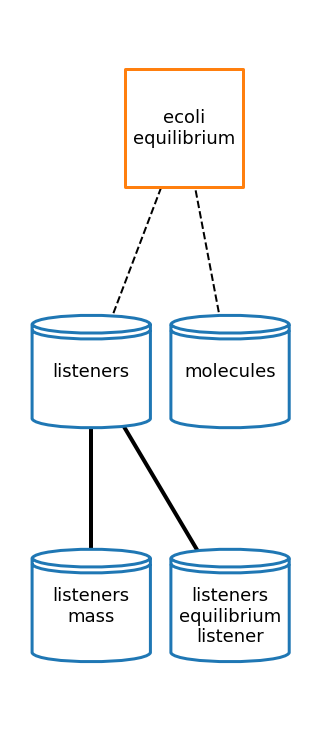

In [68]:
# plot topology
eq_topology_plot_settings = {
    'node_labels': {
        'ecoli-equilibrium': 'ecoli\nequilibrium',
        'listeners\nequilibrium_listener': '\nlisteners\nequilibrium\nlistener'
    },
    'show_ports': False,
    'node_size': 14000,
    'node_distance': 5.0,
    'dashed_edges': True,
    'font_size': 18,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-equilibrium': (1.5, 1.25)}
}

eq_topology_fig = plot_topology(equilibrium, eq_topology_plot_settings)

In [69]:
# display ports schema
pp(equilibrium.ports_schema())

{ 'listeners': { 'equilibrium_listener': { 'reaction_rates': { '_default': 0,
                                                               '_updater': 'set'}},
                 'mass': {'cell_mass': {'_default': 0}}},
  'molecules': { '4FE-4S[c]': { '_default': 0,
                                '_divider': 'binomial',
                                '_emit': True,
                                '_properties': {'bulk': True}},
                 'ACETOACETYL-COA[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'ADENINE[c]': { '_default': 0,
                                 '_divider': 'binomial',
                                 '_emit': True,
                                 '_properties': {'bulk': True}},
                 'ALAS-MONOMER[c]': { '_default': 0,
                                      '_divid

In [70]:
# run simulation and retrieve final data
eq_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': eq_topology}

eq_data = simulate_process(equilibrium, eq_settings)

print('\nsimulation output:')
pp(eq_data['bulk'])


Simulation ID: 56f0f394-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:32:12
Completed in 0.386854 seconds

simulation output:
{ '4FE-4S[c]': [0, 0, 0, 0, 0, 0],
  'ACETOACETYL-COA[c]': [17807, 17808, 17807, 17807, 17807, 17807],
  'ADENINE[c]': [4268, 4267, 4267, 4267, 4267, 4267],
  'ALAS-MONOMER[c]': [0, 0, 0, 1, 0, 0],
  'APS[c]': [5415, 5415, 5415, 5414, 5414, 5415],
  'ARABINOSE[c]': [0, 0, 0, 0, 0, 0],
  'ARCB-CPLX[i]': [0, 0, 1, 0, 0, 1],
  'ARCB-OXYGEN-CPLX[i]': [32, 32, 31, 32, 32, 31],
  'ARG[c]': [550985, 550986, 550986, 550987, 550986, 550986],
  'ASN[c]': [736527, 736527, 736527, 736527, 736527, 736527],
  'ATP[c]': [7866030, 7866030, 7866030, 7866030, 7866030, 7866030],
  'BAES-INDOLE-CPLX[i]': [0, 0, 0, 0, 0, 0],
  'BAES-MONOMER[i]': [19, 19, 19, 19, 19, 19],
  'BASS-FE+3-CPLX[i]': [0, 0, 0, 0, 0, 0],
  'BASS-MONOMER[i]': [46, 46, 46, 46, 46, 46],
  'CA+2[p]': [81683, 81682, 81682, 81683, 81683, 81682],
  'CAMP[c]': [10938, 10929, 10929, 10929, 10929, 10929],
  

In [71]:
# # plot output
# eq_fig = plot_variables(
#     eq_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

## <u>Metabolism<u/>

In [72]:
from ecoli.processes.metabolism import Metabolism

# print documentation from process docstring
print(ecoli.processes.metabolism.__doc__)


Metabolism

Metabolism sub-model. Encodes molecular simulation of microbial metabolism using flux-balance analysis.



In [73]:
# load in parameters
meta_params = load_sim_data.get_metabolism_config()

# initialize process and topology
metabolism = Metabolism(meta_params)

meta_topology = {
    'metabolites': ('bulk',),
    'catalysts': ('bulk',),
    'kinetics_enzymes': ('bulk',),
    'kinetics_substrates': ('bulk',),
    'amino_acids': ('bulk',),
    'listeners': ('listeners',),
    'environment': ('environment',),
    'polypeptide_elongation': ('process_state', 'polypeptide_elongation')
}

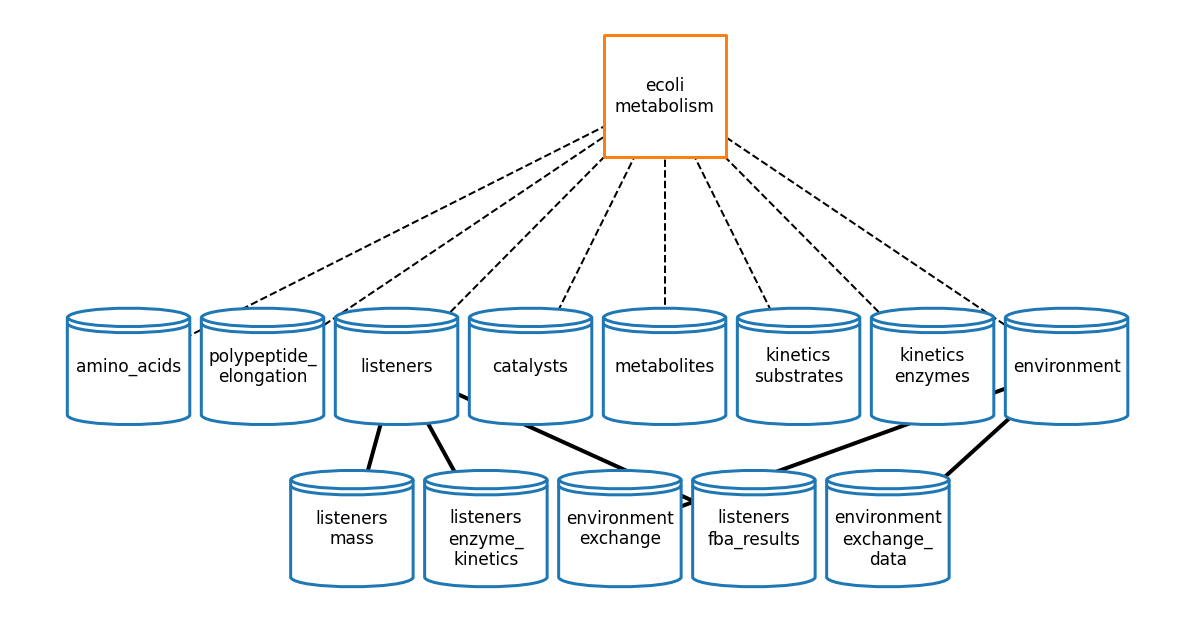

In [74]:
# plot topology
meta_topology_plot_settings = {
    'node_labels': {
        'ecoli-metabolism': 'ecoli\nmetabolism',
        'kinetics_enzymes': 'kinetics\nenzymes',
        'kinetics_substrates': 'kinetics\nsubstrates',
        'environment\nexchange_data': '\nenvironment\nexchange_\ndata',
        'listeners\nenzyme_kinetics': '\nlisteners\nenzyme_\nkinetics',
        'polypeptide_elongation': 'polypeptide_\nelongation'
    },
    'show_ports': False,
    'node_size': 15000,
    'node_distance': 3.2,
    'dashed_edges': True,
    'font_size': 17,
    'graph_format': 'hierarchy',
    'coordinates': {'ecoli-metabolism': (4.5, 2)}
}

meta_topology_fig = plot_topology(metabolism, meta_topology_plot_settings)

In [75]:
# display ports schema
pp(metabolism.ports_schema())

{ 'amino_acids': { 'ARG[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'ASN[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'CYS[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'GLN[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'GLT[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
             

                                                 '_emit': True,
                                                 '_properties': {'bulk': True}},
                 'AIRS-CPLX[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'AKBLIG-CPLX[c]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'ALD-CPLX[c]': { '_default': 0,
                                  '_divider': 'binomial',
                                  '_emit': True,
                                  '_properties': {'bulk': True}},
                 'ALDHDEHYDROG-MONOMER[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                          

                 'ASPKINIII-CPLX[c]': { '_default': 0,
                                        '_divider': 'binomial',
                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                 'ATPASE-1-CPLX[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'ATPSYN-CPLX[i]': { '_default': 0,
                                     '_divider': 'binomial',
                                     '_emit': True,
                                     '_properties': {'bulk': True}},
                 'B0070-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'B0260-MONOMER[i]':

                 'CPLX0-2502[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-251[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'CPLX0-252[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'CPLX0-253[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'CPLX0-254[c]': { '_default': 0,
                                   '_divid

                                    '_properties': {'bulk': True}},
                 'CPLX0-7712[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7717[m]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7718[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-7719[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
            

                 'CPLX0-8045[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8090[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8092[c]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8097[i]': { '_default': 0,
                                    '_divider': 'binomial',
                                    '_emit': True,
                                    '_properties': {'bulk': True}},
                 'CPLX0-8098[c]': { '_default': 0,
                             

                 'CYT-O-UBIOX-CPLX[i]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                 'CYTIDEAM-CPLX[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'CYTOCHROME-B561-MONOMER[i]': { '_default': 0,
                                                 '_divider': 'binomial',
                                                 '_emit': True,
                                                 '_properties': {'bulk': True}},
                 'CYTOCHROMEC552-MONOMER[p]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                        

                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10627-MONOMER[p]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10634-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10651-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG10662-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',


                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11646-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11662-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11665-MONOMER[i]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'EG11671-MONOMER[i]': { '_default': 0,


                 'ENTE-CPLX[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'ENVZ-CPLX[p]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_emit': True,
                                   '_properties': {'bulk': True}},
                 'ERYTH4PDEHYDROG-CPLX[c]': { '_default': 0,
                                              '_divider': 'binomial',
                                              '_emit': True,
                                              '_properties': {'bulk': True}},
                 'ETHAMLY-CPLX[c]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'EXUT-MONOMER[i]': { '_

                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6782-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6798-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6805-MONOMER[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G6806-MONOMER[c]': { '_default': 0,
                                

                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7911-MONOMER[p]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7919-MONOMER[p]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7921-MONOMER[o]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_properties': {'bulk': True}},
                 'G7942-MONOMER[i]': { '_default': 0,
                                       '_divider': 'binomial',
                                

                                             '_properties': {'bulk': True}},
                 'IDONDEHYD-MONOMER[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                 'IMIDHISTID-CPLX[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                         '_emit': True,
                                         '_properties': {'bulk': True}},
                 'IMP-DEHYDROG-CPLX[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                 'IPPISOM-MONOMER[c]': { '_default': 0,
                                         '_divider': 'binomial',
                                    

                                      '_properties': {'bulk': True}},
                 'NUPG-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'O-SUCCHOMOSERLYASE-CPLX[c]': { '_default': 0,
                                                 '_divider': 'binomial',
                                                 '_emit': True,
                                                 '_properties': {'bulk': True}},
                 'O-SUCCINYLBENZOATE-COA-SYN-MONOMER[c]': { '_default': 0,
                                                            '_divider': 'binomial',
                                                            '_emit': True,
                                                            '_properties': { 'bulk': True}},
                 'OCTAPRENYL-METHOXYPHENOL-OH-MONOMER[c]': { '_default': 0,
       

                                        '_emit': True,
                                        '_properties': {'bulk': True}},
                 'SDAC-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'SHIA-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'SIROHEMESYN-CPLX[c]': { '_default': 0,
                                          '_divider': 'binomial',
                                          '_emit': True,
                                          '_properties': {'bulk': True}},
                 'SORB6PDEHYDROG-CPLX[c]': { '_default': 0,
                                             '_divider': 'binomial',
              

                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'YFEP-MONOMER[m]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'YGFO-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'YGFU-MONOMER[i]': { '_default': 0,
                                      '_divider': 'binomial',
                                      '_emit': True,
                                      '_properties': {'bulk': True}},
                 'YGGA-MONOMER[i]': { '_default': 0,
                                      '_divider'

                                           '_properties': {'bulk': True}},
                        'CPLX0-3901[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                        'CPLX0-3929[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                        'CPLX0-3936[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                        'CPLX0-3941[c]': { '_default': 0,
                                           '_divider': 'binomial',
                          

                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                        'EG12098-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                        'EG12104-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                                                '_properties': {'bulk': True}},
                        'EG12163-MONOMER[c]': { '_default': 0,
                                                '_divider': 'binomial',
                                                '_emit': True,
                               

                        'KDPGALDOL-4OH2OXOGLUTARALDOL-CPLX[c]': { '_default': 0,
                                                                  '_divider': 'binomial',
                                                                  '_emit': True,
                                                                  '_properties': { 'bulk': True}},
                        'KDUD-MONOMER[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                        'L-ASPARTATE-OXID-MONOMER[c]': { '_default': 0,
                                                         '_divider': 'binomial',
                                                         '_emit': True,
                                                         '_properties': { 'bulk': True}},
                        'L-GLN-FRUCT-6-P-AMINOTRANS-CPLX[c]': { '_de

                           'ACETYL-P[c]': { '_default': 0,
                                            '_divider': 'binomial',
                                            '_emit': True,
                                            '_properties': {'bulk': True}},
                           'ADENINE[c]': { '_default': 0,
                                           '_divider': 'binomial',
                                           '_emit': True,
                                           '_properties': {'bulk': True}},
                           'ADENOSINE[c]': { '_default': 0,
                                             '_divider': 'binomial',
                                             '_emit': True,
                                             '_properties': {'bulk': True}},
                           'ADP[c]': { '_default': 0,
                                       '_divider': 'binomial',
                                       '_emit': True,
                                       '_pr

                                      'targetFluxesUpper': { '_default': [],
                                                             '_updater': 'set'}},
                 'fba_results': { 'catalyst_counts': { '_default': 0,
                                                       '_updater': 'set'},
                                  'coefficient': { '_default': 0.0,
                                                   '_updater': 'set'},
                                  'conc_updates': { '_default': [],
                                                    '_updater': 'set'},
                                  'constrained_molecules': { '_default': [],
                                                             '_updater': 'set'},
                                  'deltaMetabolites': { '_default': [],
                                                        '_updater': 'set'},
                                  'externalExchangeFluxes': { '_default': [],
                                 

                   'NADP[c]': { '_default': 0,
                                '_divider': 'binomial',
                                '_emit': True,
                                '_properties': {'bulk': True}},
                   'NAD[c]': { '_default': 0,
                               '_divider': 'binomial',
                               '_emit': True,
                               '_properties': {'bulk': True}},
                   'NI+2[c]': { '_default': 0,
                                '_divider': 'binomial',
                                '_emit': True,
                                '_properties': {'bulk': True}},
                   'NI+2[p]': { '_default': 0,
                                '_divider': 'binomial',
                                '_emit': True,
                                '_properties': {'bulk': True}},
                   'OROTATE[c]': { '_default': 0,
                                   '_divider': 'binomial',
                                   '_em

In [76]:
# run simulation and retrieve final data
meta_settings = {
    'total_time': 10,
    'initial_state': initial_state,
    'topology': meta_topology}

meta_data = simulate_process(metabolism, meta_settings)

print('\nsimulation output:')
pp(meta_data['bulk'])


Simulation ID: 5c0c67b4-fc19-11eb-9860-3c15c2dc0586
Created: 08/13/2021 at 02:32:21
Completed in 2.70 seconds

simulation output:
{ '1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]': [129, 129, 129, 129, 129, 129],
  '1-PFK[c]': [31, 31, 31, 31, 31, 31],
  '2-3-DIHYDROXYBENZOATE[c]': [112722, 112776, 112776, 112776, 112776, 112776],
  '2-DEHYDROPANTOATE-REDUCT-MONOMER[c]': [245, 245, 245, 245, 245, 245],
  '2-ISOPROPYLMALATESYN-MONOMER[c]': [1604, 1604, 1604, 1604, 1604, 1604],
  '2-KETOGLUTARATE[c]': [288340, 288478, 288478, 288478, 288478, 288478],
  '2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]': [702, 702, 702, 702, 702, 702],
  '2-PG[c]': [74984, 75020, 75020, 75020, 75020, 75021],
  '2K-4CH3-PENTANOATE[c]': [112721, 112776, 112776, 112776, 112776, 112776],
  '2OXOGLUTARATEDEH-CPLX[c]': [102, 102, 102, 102, 102, 102],
  '3-ISOPROPYLMALDEHYDROG-CPLX[c]': [1590, 1590, 1590, 1590, 1590, 1590],
  '3-ISOPROPYLMALISOM-CPLX[c]': [3474, 3474, 3474, 3474, 3474, 3474],
  '3-METHYL-2-OXOBUT-OHCH3

  'EG11433-MONOMER[c]': [596, 596, 596, 596, 596, 596],
  'EG11437-MONOMER[c]': [11, 11, 11, 11, 11, 11],
  'EG11438-MONOMER[c]': [1032, 1032, 1032, 1032, 1032, 1032],
  'EG11440-MONOMER[c]': [1435, 1435, 1435, 1435, 1435, 1435],
  'EG11445-MONOMER[i]': [13, 13, 13, 13, 13, 13],
  'EG11470-MONOMER[c]': [312, 312, 312, 312, 312, 312],
  'EG11471-MONOMER[i]': [29, 29, 29, 29, 29, 29],
  'EG11486-MONOMER[i]': [18, 18, 18, 18, 18, 18],
  'EG11494-MONOMER[i]': [82, 82, 82, 82, 82, 82],
  'EG11497-MONOMER[c]': [705, 705, 705, 705, 705, 705],
  'EG11498-MONOMER[c]': [19, 19, 19, 19, 19, 19],
  'EG11503-MONOMER[c]': [47, 47, 47, 47, 47, 47],
  'EG11507-MONOMER[c]': [400, 400, 400, 400, 400, 400],
  'EG11512-MONOMER[i]': [93, 93, 93, 93, 93, 93],
  'EG11538-MONOMER[c]': [62, 62, 62, 62, 62, 62],
  'EG11551-MONOMER[c]': [10, 10, 10, 10, 10, 10],
  'EG11579-MONOMER[c]': [24, 24, 24, 24, 24, 24],
  'EG11581-MONOMER[c]': [2218, 2218, 2218, 2218, 2218, 2218],
  'EG11591-MONOMER[c]': [366, 366, 366, 

  'L-CITRULLINE[c]': [623238, 623536, 623536, 623536, 623536, 623536],
  'L-GLN-FRUCT-6-P-AMINOTRANS-CPLX[c]': [577, 577, 577, 577, 577, 577],
  'L-LACTDEHYDROGFMN-MONOMER[i]': [119, 119, 119, 119, 119, 119],
  'L-ORNITHINE[c]': [8249, 8254, 8254, 8254, 8254, 8254],
  'L-SELENOCYSTEINE[c]': [29814, 29828, 29829, 29829, 29829, 29829],
  'LACTALDREDUCT-CPLX[c]': [77, 77, 77, 77, 77, 77],
  'LACY-MONOMER[m]': [8, 8, 8, 8, 8, 8],
  'LAUROYLACYLTRAN-MONOMER[m]': [161, 161, 161, 161, 161, 161],
  'LCTP-MONOMER[i]': [57, 57, 57, 57, 57, 57],
  'LDC2-CPLX[c]': [2, 2, 2, 2, 2, 2],
  'LEU[c]': [253325, 253325, 253325, 253325, 253325, 253325],
  'LL-DIAMINOPIMELATE[c]': [88217, 88259, 88259, 88259, 88259, 88260],
  'LSERINEDEAM1-MONOMER[c]': [219, 219, 219, 219, 219, 219],
  'LSERINEDEAM2-MONOMER[c]': [43, 43, 43, 43, 43, 43],
  'LTAA-CPLX[c]': [101, 101, 101, 101, 101, 101],
  'LTARTDEHYDRA-CPLX[c]': [2, 2, 2, 2, 2, 2],
  'LUMAZINESYN-CPLX[c]': [24, 24, 24, 24, 24, 24],
  'LYSDECARBOX-CPLX[c]': 

In [77]:
# # plot output
# meta_fig = plot_variables(
#     meta_data, 
#     variables=[
#         ],
#     column_width=10, row_height=3, row_padding=0.5)

# **3. Combining Processes**

TODO: Show the following combinations

1. Transcript initiation + transcript elongation
2. Polypeptide initiation + polypeptide elongation
3. Polypeptide initiation + polypeptide elongation + complexation
4. Transcript initiation + transcript elongation + tf binding ???

# **4. Run Ecoli Master**

experiments/ecoli_master_sim.py